<a href="https://colab.research.google.com/github/Eylz-Liu/Mod-le-vol-locale/blob/main/Etude_GSE_Output_v1911.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 1 - Importation de tirage


In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from sklearn.cluster import KMeans

1.1 Extraction de GSE Taux *court* Yearly


In [2]:
# Étape 1 : Uploader le fichier Excel depuis ton ordinateur
from google.colab import files
uploaded = files.upload()  # Choisis le fichier SXE5 OVDV 1211.xlsx

# Remplace par le nom exact du fichier uploadé
filename = "TIRAGES_TXCOURT_Y.xlsx"

# Lire la 2e feuille (index 1) sans en-tête
df = pd.read_excel(filename, sheet_name=0, header=None)

# Étape 3 : Extraire les strikes (première ligne, hors première colonne)

maturities = df.iloc[0, 1:].astype(float).values # .str.replace('%', '').astype(float).values

# Étape 4 : Extraire les maturités (première colonne, hors première ligne)
scenario = df.iloc[1:, 0].astype(float).values
print("T_array (maturities):", maturities.shape)

# Étape 5 : Extraire la matrice IV (le reste du tableau)
TL_matrix = df.iloc[1:, 1:].astype(float).values

# Étape 6 : Afficher les résultats
#print("scenario:", scenario)
print("Maturities (years):", maturities)
print("TL Matrix shape:", TL_matrix.shape)
print("TL Matrix (extrait):\n", TL_matrix[:5, :7])  # Affiche un extrait

Saving TIRAGES_TXCOURT_Y.xlsx to TIRAGES_TXCOURT_Y.xlsx
T_array (maturities): (42,)
Maturities (years): [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42.]
TL Matrix shape: (1000, 42)
TL Matrix (extrait):
 [[0.02545417 0.04132304 0.04553993 0.02755292 0.01473777 0.01002518
  0.01163666]
 [0.02545417 0.00696715 0.00398873 0.01888655 0.03269351 0.04046442
  0.03983933]
 [0.02545417 0.0192707  0.01167816 0.00756667 0.00883847 0.01948922
  0.01400606]
 [0.02545417 0.02490723 0.03338901 0.04304006 0.04112793 0.02799685
  0.03645493]
 [0.02545417 0.01238482 0.00752674 0.01123586 0.0152697  0.0229885
  0.02645372]]


 extraction Taux long Tirage

In [3]:
# Étape 1 : ********* Taux Long Yearly **************************************
# ***********************************************************************
from google.colab import files
uploaded = files.upload()  # Choisis le fichier SXE5 OVDV 1211.xlsx

# Remplace par le nom exact du fichier uploadé
filename = "TIRAGES_TXLONG_Y.xlsx"

# Lire la 2e feuille (index 1) sans en-tête
df = pd.read_excel(filename, sheet_name=0, header=None)

# Étape 3 : Extraire les strikes (première ligne, hors première colonne)

maturities = df.iloc[0, 1:].astype(float).values # .str.replace('%', '').astype(float).values

# Étape 4 : Extraire les maturités (première colonne, hors première ligne)
scenario = df.iloc[1:, 0].astype(float).values
print("T_array (maturities):", maturities.shape)

# Étape 5 : Extraire la matrice IV (le reste du tableau)
TLT_matrix = df.iloc[1:, 1:].astype(float).values

# Étape 6 : Afficher les résultats
#print("scenario:", scenario)
print("Maturities (years):", maturities)
print("TLT Matrix shape:", TLT_matrix.shape)
print("TLT Matrix (extrait):\n", TLT_matrix[:5, :7])  # Affiche un extrait

Saving TIRAGES_TXLONG_Y.xlsx to TIRAGES_TXLONG_Y.xlsx
T_array (maturities): (42,)
Maturities (years): [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42.]
TLT Matrix shape: (1000, 42)
TLT Matrix (extrait):
 [[0.02487799 0.03097075 0.03394734 0.03146827 0.0278616  0.02064993
  0.02682506]
 [0.02487799 0.01986689 0.018398   0.02064449 0.0248214  0.03306923
  0.02625613]
 [0.02487799 0.01993678 0.02234273 0.02331865 0.01983167 0.01821649
  0.02104267]
 [0.02487799 0.03029036 0.02885652 0.02903714 0.03340042 0.03545674
  0.03227611]
 [0.02487799 0.01386565 0.01844111 0.02399018 0.02519239 0.01959118
  0.01083871]]


Extraction Tirage Action transformé en %

In [44]:
# Étape 1 : ********* ACTION Yearly **************************************
# ***********************************************************************
from google.colab import files
uploaded = files.upload()  # Choisis le fichier SXE5 OVDV 1211.xlsx

# Remplace par le nom exact du fichier uploadé
filename = "TIRAGES_INDACT_Y6.xlsx"

# Lire la 2e feuille (index 1) sans en-tête
df = pd.read_excel(filename, sheet_name="V2", header=None)

# Étape 3 : Extraire les strikes (première ligne, hors première colonne)

maturities = df.iloc[0, 1:].astype(float).values # .str.replace('%', '').astype(float).values

# Étape 4 : Extraire les maturités (première colonne, hors première ligne)
scenario = df.iloc[1:, 0].astype(float).values
print("T_array (maturities - indice action):", maturities.shape)

# Étape 5 : Extraire la matrice IV (le reste du tableau)
ACT_matrix = df.iloc[1:, 1:].astype(float).values

# Étape 6 : Afficher les résultats
#print("scenario:", scenario)
print("Maturities (years) - indice action:", maturities)
print("TL Matrix shape - indice action:", TL_matrix.shape)
print("TL Matrix (extrait) - indice action:\n", TL_matrix[:5, :7])  # Affiche un extrait

Saving TIRAGES_INDACT_Y6.xlsx to TIRAGES_INDACT_Y6.xlsx
T_array (maturities - indice action): (42,)
Maturities (years) - indice action: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42.]
TL Matrix shape - indice action: (1000, 42)
TL Matrix (extrait) - indice action:
 [[0.02545417 0.04132304 0.04553993 0.02755292 0.01473777 0.01002518
  0.01163666]
 [0.02545417 0.00696715 0.00398873 0.01888655 0.03269351 0.04046442
  0.03983933]
 [0.02545417 0.0192707  0.01167816 0.00756667 0.00883847 0.01948922
  0.01400606]
 [0.02545417 0.02490723 0.03338901 0.04304006 0.04112793 0.02799685
  0.03645493]
 [0.02545417 0.01238482 0.00752674 0.01123586 0.0152697  0.0229885
  0.02645372]]


In [64]:
ACT_matrix = df.iloc[1:, 1:].astype(float).values

# Afficher les 3 premières lignes de ACT_matrix
print("Les 3 premières lignes de ACT_matrix :")
print(ACT_matrix[28, :])

Les 3 premières lignes de ACT_matrix :
[ 0.          0.09896597 -0.26227887  0.26652086 -0.10175865  0.134288
 -0.03097104  0.18868369 -0.18040305  0.46748147  0.02945391 -0.16423842
  0.44012024  0.35959755  0.0298143   0.23854668  0.01379336  0.10279556
  0.28953132  0.11949788  0.13528635  0.1094961   0.17637726  0.07593059
  0.05356527  0.07045009  0.1074863   0.11655022  0.10542701  0.04090045
  0.0474559   0.12761311  0.09972053  0.1218953   0.13361688  0.17065931
  0.16169785  0.28601079  0.3345357   0.27747401  0.42006186  0.44702295]


Extraction IMMO transformé en %

In [5]:
# Étape 1 : ********* Indice IMMO Yearly **************************************
# ***********************************************************************
from google.colab import files
uploaded = files.upload()  # Choisis le fichier SXE5 OVDV 1211.xlsx

# Remplace par le nom exact du fichier uploadé
filename = "TIRAGES_INDIMMO_Y2.xlsx"

# Lire la 2e feuille (index 1) sans en-tête
df = pd.read_excel(filename, sheet_name="V2", header=None)

# Étape 3 : Extraire les strikes (première ligne, hors première colonne)

maturities = df.iloc[0, 1:].astype(float).values # .str.replace('%', '').astype(float).values

# Étape 4 : Extraire les maturités (première colonne, hors première ligne)
scenario = df.iloc[1:, 0].astype(float).values
print("T_array (maturities) - indice immo:", maturities.shape)

# Étape 5 : Extraire la matrice IV (le reste du tableau)
IMMO_matrix = df.iloc[1:, 1:].astype(float).values

# Étape 6 : Afficher les résultats
#print("scenario:", scenario)
print("Maturities (years) - indice immo:", maturities)
print("TLT Matrix shape - indice immo:", TLT_matrix.shape)
print("TLT Matrix (extrait) - indice immo:\n", TLT_matrix[:5, :7])  # Affiche un extrait

Saving TIRAGES_INDIMMO_Y2.xlsx to TIRAGES_INDIMMO_Y2.xlsx
T_array (maturities) - indice immo: (42,)
Maturities (years) - indice immo: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42.]
TLT Matrix shape - indice immo: (1000, 42)
TLT Matrix (extrait) - indice immo:
 [[0.02487799 0.03097075 0.03394734 0.03146827 0.0278616  0.02064993
  0.02682506]
 [0.02487799 0.01986689 0.018398   0.02064449 0.0248214  0.03306923
  0.02625613]
 [0.02487799 0.01993678 0.02234273 0.02331865 0.01983167 0.01821649
  0.02104267]
 [0.02487799 0.03029036 0.02885652 0.02903714 0.03340042 0.03545674
  0.03227611]
 [0.02487799 0.01386565 0.01844111 0.02399018 0.02519239 0.01959118
  0.01083871]]


Extraction des output BE&PVFFP des 1000 scénarios

In [6]:
# Étape 1 : ********* Output BE PVFP **************************************
# ***********************************************************************
from google.colab import files
uploaded = files.upload()  # Choisis le fichier SXE5 OVDV 1211.xlsx

# Remplace par le nom exact du fichier uploadé
filename = "BE_PVFP.xlsx"

# Lire la 2e feuille (index 1) sans en-tête
df = pd.read_excel(filename, sheet_name="V2", header=None)
df = df.iloc[1:].reset_index(drop=True)

# Vérifier la structure
print("Shape du fichier :", df.shape)
print("Aperçu des premières lignes :\n", df.head())


# Extraire les colonnes BE et PVFP
be_array = df.iloc[:, 1].values       # 2e colonne → BE
pvfp_array = df.iloc[:, 2].values     # 3e colonne → PVFP

# Optionnel : convertir en DataFrames séparés
be_df = pd.DataFrame(be_array, columns=["BE"])
pvfp_df = pd.DataFrame(pvfp_array, columns=["PVFP"])


Saving BE_PVFP.xlsx to BE_PVFP.xlsx
Shape du fichier : (1000, 3)
Aperçu des premières lignes :
    0             1            2
0  1  10575371.264    414908.64
1  2  14082946.048      1583008
2  3  11811144.704   513327.008
3  4   12618593.28  1386158.336
4  5  12981169.152   997441.344


In [7]:
# Affichage
print("BE (array):", be_array[:5])
print("PVFP (array):", pvfp_array[:5])

# Affichage complet des DataFrames
print("BE DataFrame :\n", be_df)
print("PVFP DataFrame :\n", pvfp_df)

BE (array): [10575371.264 14082946.048 11811144.704 12618593.28 12981169.152]
PVFP (array): [414908.64 1583008 513327.008 1386158.336 997441.344]
BE DataFrame :
                BE
0    10575371.264
1    14082946.048
2    11811144.704
3     12618593.28
4    12981169.152
..            ...
995  10347578.368
996   10410808.32
997  12838995.968
998  11640549.376
999  11731661.824

[1000 rows x 1 columns]
PVFP DataFrame :
             PVFP
0      414908.64
1        1583008
2     513327.008
3    1386158.336
4     997441.344
..           ...
995   888557.248
996  1019376.576
997   102227.272
998   703375.296
999   962644.352

[1000 rows x 1 columns]


# Section 2 - étude statistique exploratoire

Fonction de plot 1000 trajectoires

In [8]:


def plot_scenario_trajectories(TL_matrix, maturities, plot_title):
    """
    Affiche les trajectoires de taux simulés avec la moyenne en surbrillance et annotations.

    Parameters:
    - TL_matrix : np.ndarray, shape (n_scenarios, n_years)
    - maturities : array-like, les années correspondantes
    - plot_title : str, titre du graphique
    """
    plt.figure(figsize=(14, 7))

    # Tracer tous les scénarios
    for i in range(TL_matrix.shape[0]):
        plt.plot(maturities, TL_matrix[i, :], color='gray', alpha=0.1)

    # Moyenne par année
    mean_by_year = TL_matrix.mean(axis=0)
    plt.plot(maturities, mean_by_year, color='pink', linewidth=2, label='Moyenne')

    # Points annotés
    indices_to_annotate = [0, 10, 20, 30, 39]
    for idx in indices_to_annotate:
        if idx < len(maturities):
            x = maturities[idx]
            y = mean_by_year[idx]
            plt.scatter(x, y, color='pink', zorder=5)
            plt.text(x, y + 0.02, f"{y*100:.2f}%", fontsize=9, ha='center', va='bottom', color='pink')

    # Personnalisation
    plt.title(plot_title, fontsize=16)
    plt.xlabel("Années", fontsize=12)
    plt.ylabel("Taux", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()


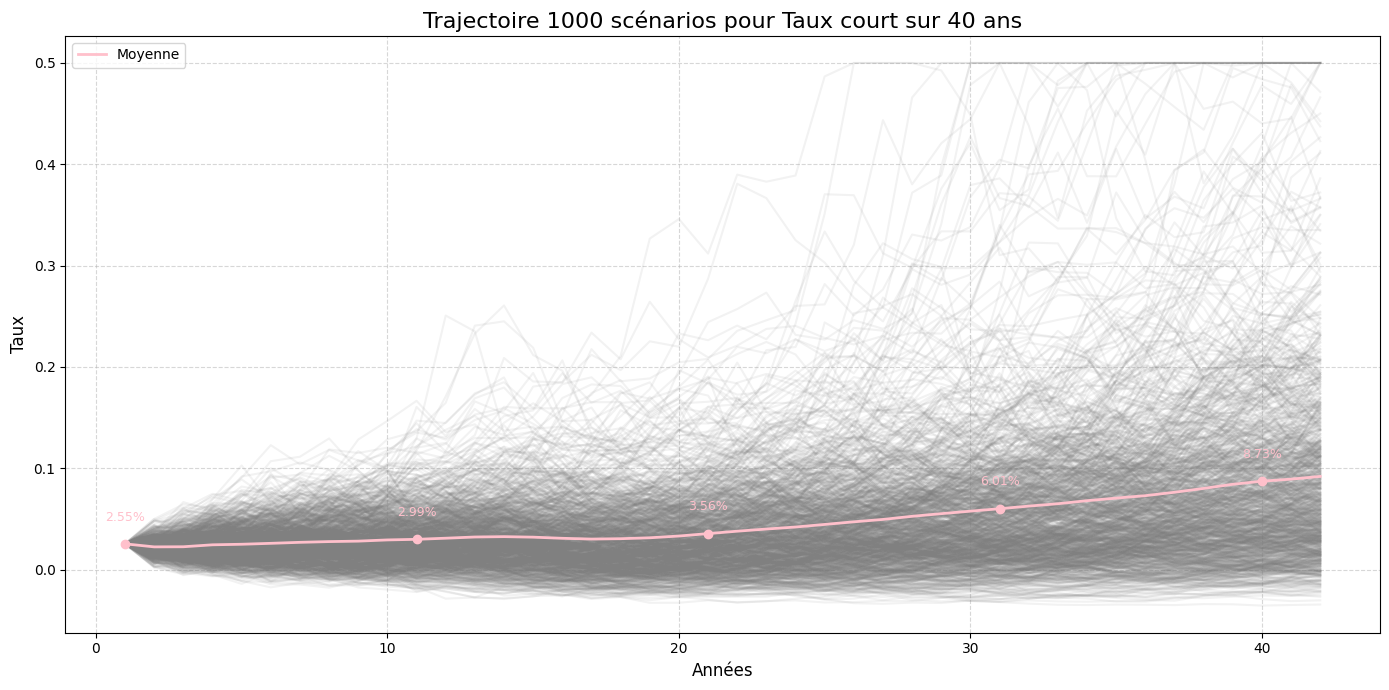

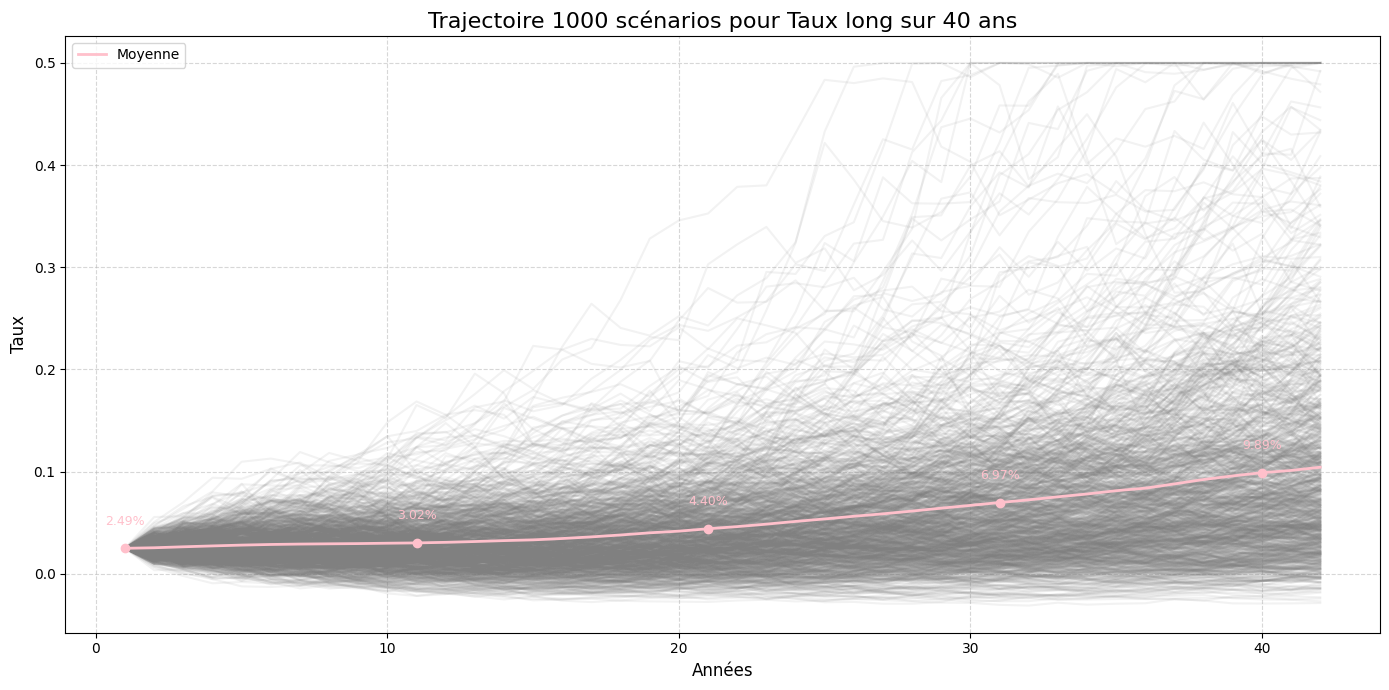

In [9]:
plot_scenario_trajectories(TL_matrix, maturities, "Trajectoire 1000 scénarios pour Taux court sur 40 ans")
plot_scenario_trajectories(TLT_matrix, maturities, "Trajectoire 1000 scénarios pour Taux long sur 40 ans")

Fonction de plot trajectoire positive & négative

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def plot_positive_negative_trajectories(TL_matrix, maturities):
    """
    Sépare et trace les trajectoires positives et négatives selon la moyenne par scénario.

    Parameters:
    - TL_matrix : np.ndarray, shape (n_scenarios, n_years)
    - maturities : array-like, les années correspondantes
    """
    # Séparation des scénarios
    mean_by_scenario = TL_matrix.mean(axis=1)
    positive_indices = np.where(mean_by_scenario > 0)[0]
    negative_indices = np.where(mean_by_scenario < 0)[0]

    TL_positive = TL_matrix[positive_indices, :]
    TL_negative = TL_matrix[negative_indices, :]

    # Choix des années à annoter
    indices_to_annotate = [0, 10, 20, 30, 39]

    # 📈 Groupe 1 : Trajectoires positives
    plt.figure(figsize=(12, 6))
    for i in range(TL_positive.shape[0]):
        plt.plot(maturities, TL_positive[i, :], color='lightgreen', alpha=0.05)

    mean_pos = TL_positive.mean(axis=0)
    plt.plot(maturities, mean_pos, color='yellow', linewidth=2, label='Moyenne (positive)')

    for idx in indices_to_annotate:
        if idx < len(maturities):
            x = maturities[idx]
            y = mean_pos[idx]
            plt.scatter(x, y, color='yellow', zorder=5)
            plt.text(x, y + 0.02, f"{y*100:.2f}%", fontsize=9, ha='center', va='bottom', color='yellow')

    plt.title(f"Trajectoires positives ({len(positive_indices)} scénarios)", fontsize=16)
    plt.xlabel("Années")
    plt.ylabel("Taux")
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # 📉 Groupe 2 : Trajectoires négatives
    plt.figure(figsize=(12, 6))
    for i in range(TL_negative.shape[0]):
        plt.plot(maturities, TL_negative[i, :], color='red', alpha=0.05)

    mean_neg = TL_negative.mean(axis=0)
    plt.plot(maturities, mean_neg, color='blue', linewidth=2, label='Moyenne (négative)')

    for idx in indices_to_annotate:
        if idx < len(maturities):
            x = maturities[idx]
            y = mean_neg[idx]
            plt.scatter(x, y, color='blue', zorder=5)
            plt.text(x, y + 0.02, f"{y*100:.2f}%", fontsize=9, ha='center', va='bottom', color='blue')

    plt.title(f"Trajectoires négatives ({len(negative_indices)} scénarios)", fontsize=16)
    plt.xlabel("Années")
    plt.ylabel("Taux")
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.legend()
    plt.tight_layout()
    plt.show()

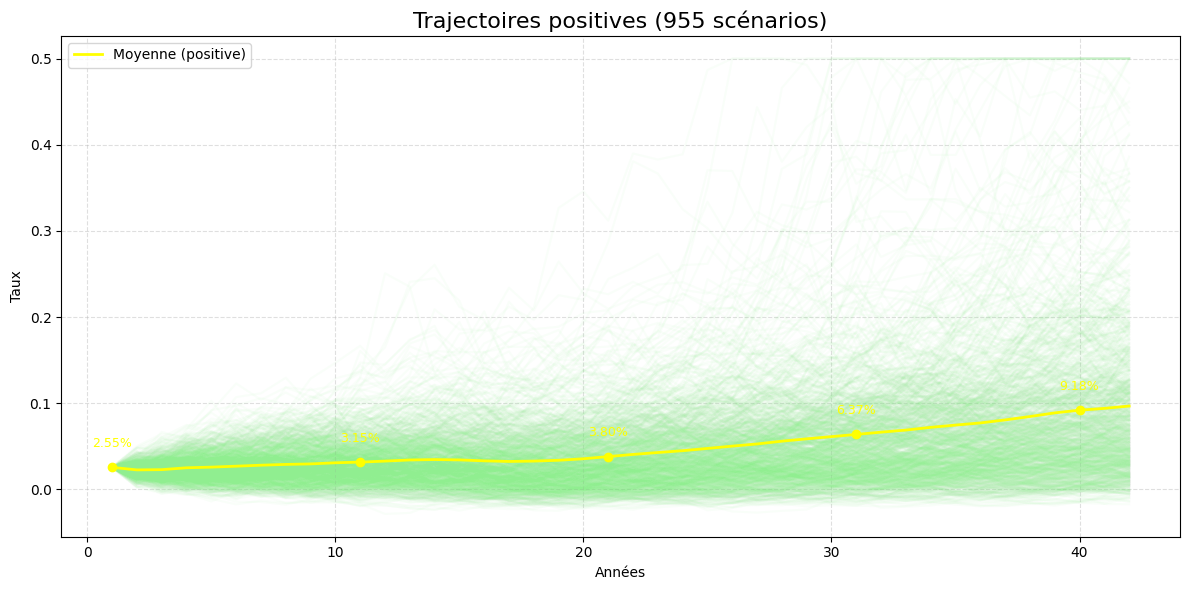

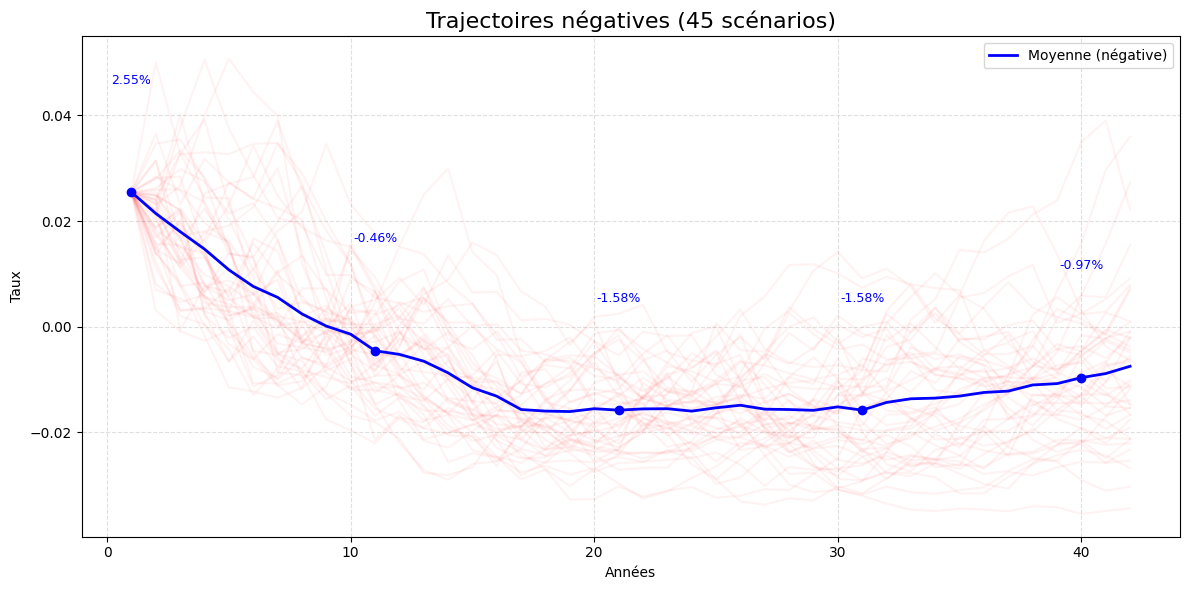

In [11]:
plot_positive_negative_trajectories(TL_matrix, maturities)

1.2 Statistiques descriptives par année ( par colonnes) sur les 1000 scnéarios

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def plot_yearly_statistics(TL_matrix, maturities, plot_titre):
    """
    Trace les statistiques par année : moyenne, médiane, min, max, ±1 écart-type.

    Parameters:
    - TL_matrix : np.ndarray, shape (n_scenarios, n_years)
    - maturities : array-like, les années correspondantes
    - plot_titre : str, titre du graphique
    """
    # Calcul des statistiques
    mean_by_year = np.mean(TL_matrix, axis=0)
    median_by_year = np.median(TL_matrix, axis=0)
    std_by_year = np.std(TL_matrix, axis=0)
    min_by_year = np.min(TL_matrix, axis=0)
    max_by_year = np.max(TL_matrix, axis=0)

    # Indices à annoter
    indices_to_annotate = [0, 10, 20, 30, 39]

    plt.figure(figsize=(12, 6))

    # Tracer les courbes principales
    plt.plot(maturities, mean_by_year, label='Moyenne', color='blue', linewidth=2)
    plt.plot(maturities, median_by_year, label='Médiane', color='green', linestyle='--')
    plt.plot(maturities, min_by_year, label='Min', color='red', linestyle=':')
    plt.plot(maturities, max_by_year, label='Max', color='orange', linestyle=':')

    # Zone ±1 écart-type
    plt.fill_between(maturities,
                     mean_by_year - std_by_year,
                     mean_by_year + std_by_year,
                     alpha=0.2, label='Moyenne ±1σ', color='lightblue')

    # Points annotés
    for idx in indices_to_annotate:
        if idx < len(maturities):
            x = maturities[idx]

            y_mean = mean_by_year[idx]
            plt.scatter(x, y_mean, color='blue', zorder=5)
            plt.text(x, y_mean + 0.005, f"{y_mean*100:.2f}%", fontsize=9, ha='center', va='bottom', color='blue')

            y_median = median_by_year[idx]
            plt.scatter(x, y_median, color='green', zorder=5)
            plt.text(x, y_median + 0.005, f"{y_median*100:.2f}%", fontsize=9, ha='center', va='bottom', color='green')

            y_min = min_by_year[idx]
            plt.scatter(x, y_min, color='red', zorder=5)
            plt.text(x, y_min + 0.005, f"{y_min*100:.2f}%", fontsize=9, ha='center', va='bottom', color='red')

            y_max = max_by_year[idx]
            plt.scatter(x, y_max, color='orange', zorder=5)
            plt.text(x, y_max + 0.005, f"{y_max*100:.2f}%", fontsize=9, ha='center', va='bottom', color='orange')

    # Personnalisation
    plt.title(plot_titre, fontsize=16)
    plt.xlabel("Années", fontsize=12)
    plt.ylabel("Taux", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.legend()
    plt.tight_layout()
    plt.show()

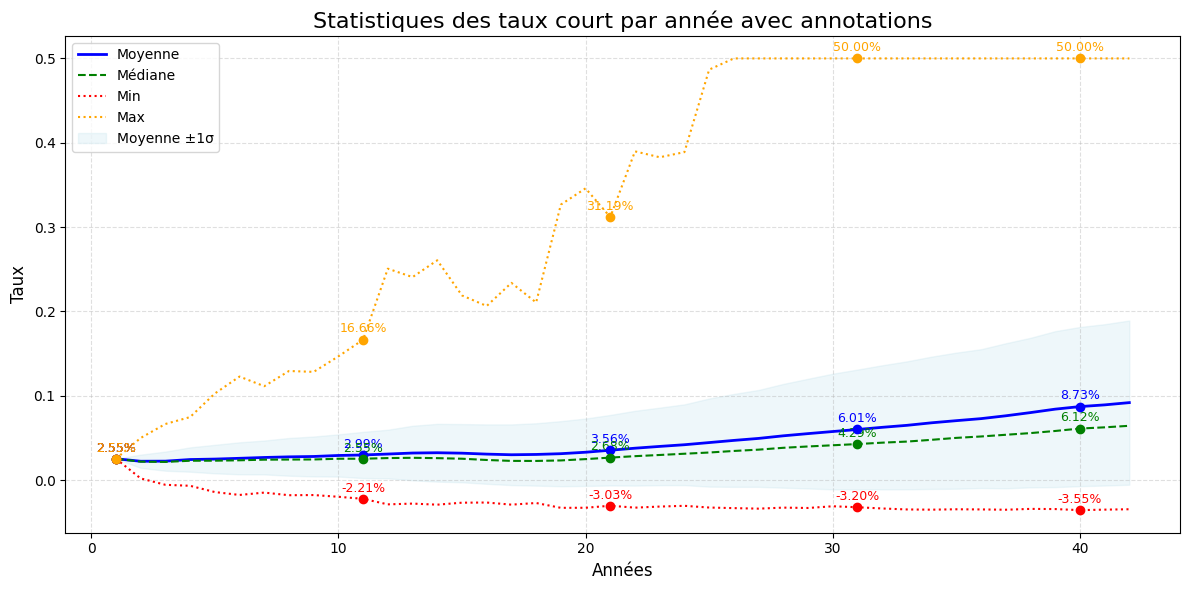

In [13]:
plot_yearly_statistics(TL_matrix, maturities, "Statistiques des taux court par année avec annotations")

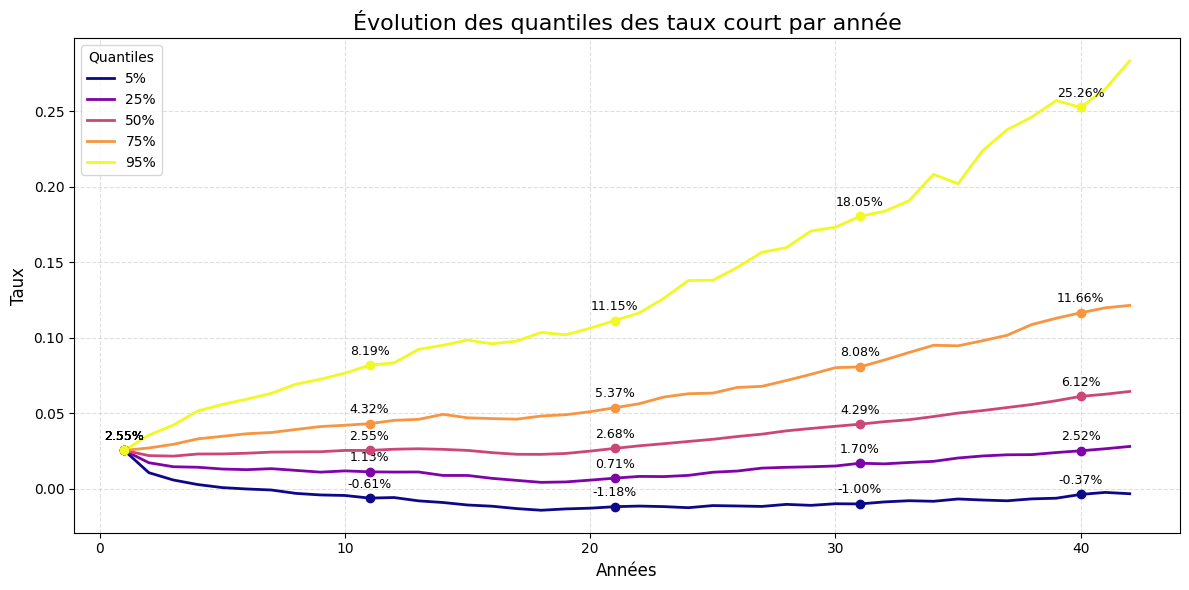

In [14]:

#*******************************************************************
# 1.2.2 - Quantile sur 1000 scénarios par année
#*******************************************************************
# Définir les niveaux de quantiles
quantile_levels = [0.05, 0.25, 0.5, 0.75, 0.95]

# Créer un DataFrame pour stocker les quantiles
quantile_df = pd.DataFrame(index=quantile_levels, columns=maturities)

# Calculer les quantiles pour chaque année
for i, year in enumerate(maturities):
    quantile_df[year] = np.quantile(TL_matrix[:, i], quantile_levels)

# Choisir les indices d'années à annoter (ex : début, milieu, fin)
indices_to_annotate = [0, 10, 20, 30, 39]

# Tracer les courbes de quantiles
plt.figure(figsize=(12, 6))
colors = plt.cm.plasma(np.linspace(0, 1, len(quantile_levels)))

for i, q in enumerate(quantile_levels):
    y_values = quantile_df.loc[q]
    plt.plot(maturities, y_values, label=f"{int(q*100)}%", color=colors[i], linewidth=2)

    # Ajouter des points annotés
    for idx in indices_to_annotate:
        x = maturities[idx]
        y = y_values.iloc[idx]
        plt.scatter(x, y, color=colors[i], zorder=5)
        plt.text(x, y + 0.005, f"{y*100:.2f}%", fontsize=9, ha='center', va='bottom', color='black')

# Personnalisation
plt.title("Évolution des quantiles des taux court par année", fontsize=16)
plt.xlabel("Années", fontsize=12)
plt.ylabel("Taux", fontsize=12)
plt.legend(title="Quantiles")
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


1.3 Analyse par scénario / par ligne sur 40ans de projection

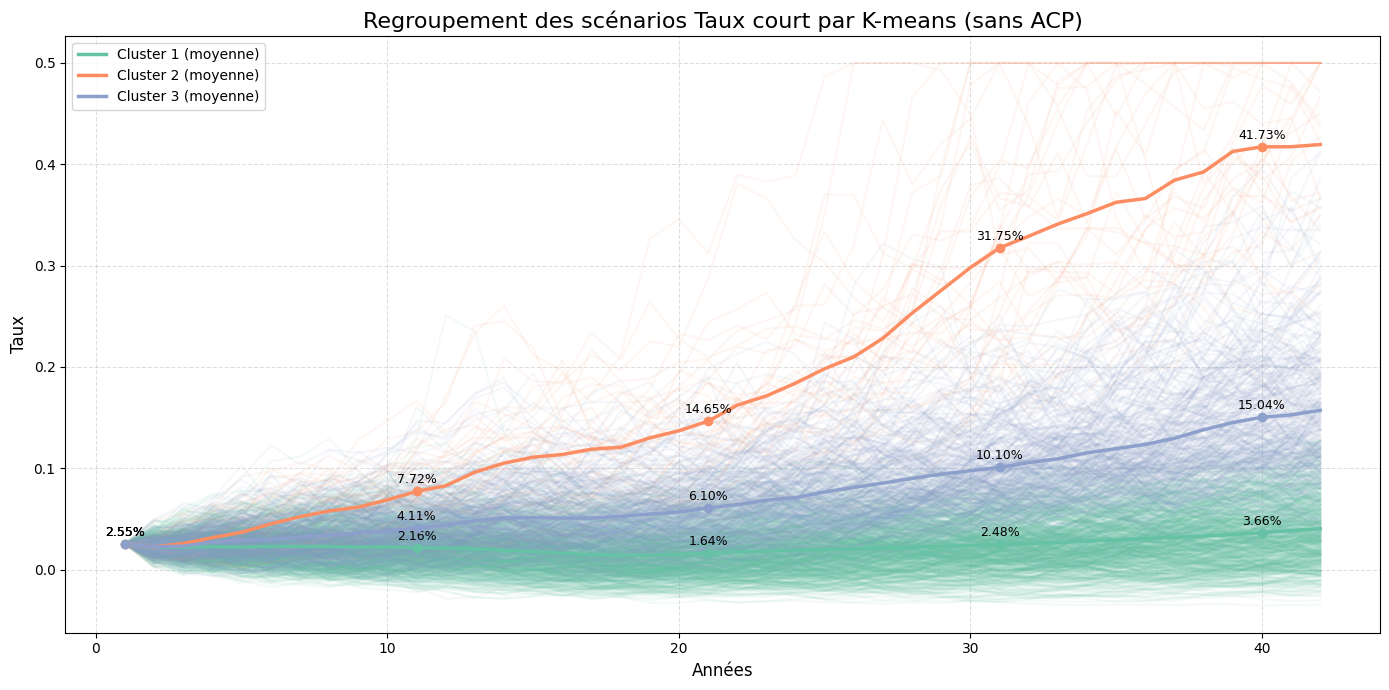

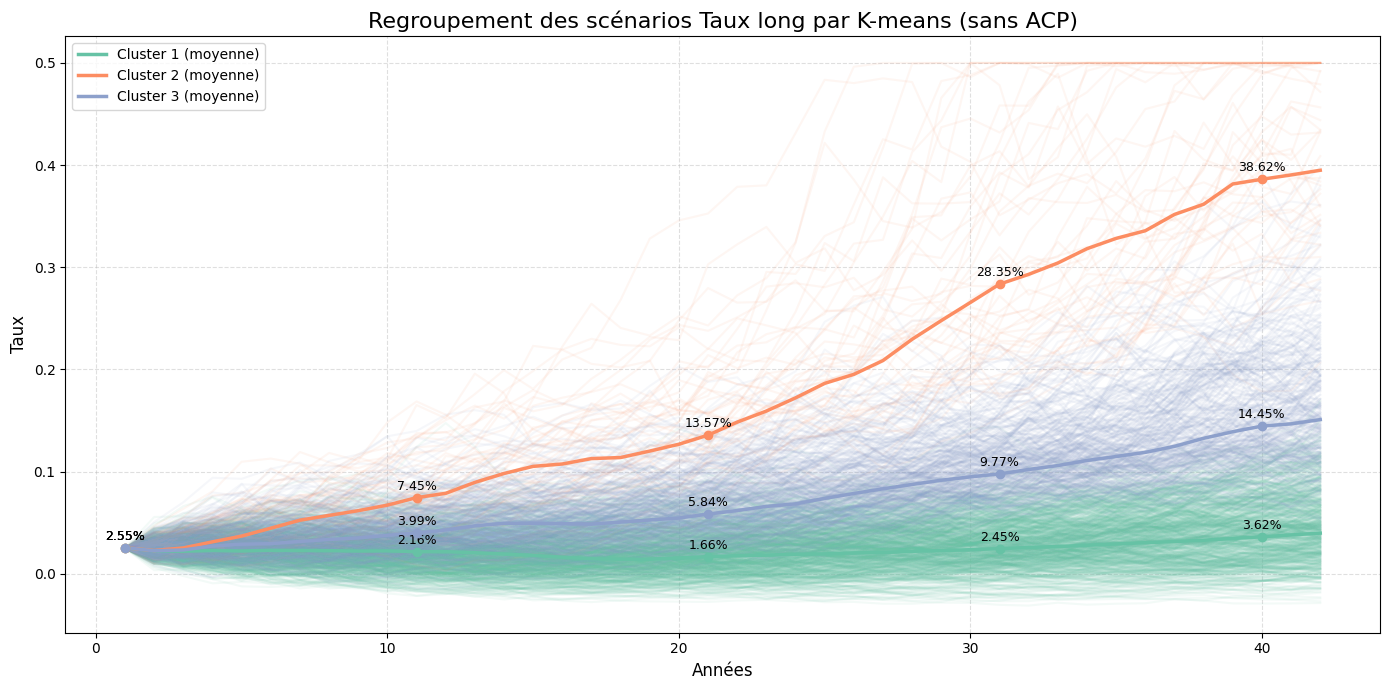

In [15]:
# ****************************************************************** Tuax court ******* axis = 0, par ligne/par scénario **************************************************
# Étape 1 : Appliquer K-means sur les scénarios
k = 3  # nombre de groupes à ajuster selon ton besoin
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(TL_matrix)

# Étape 2 : Visualiser les scénarios regroupés
plt.figure(figsize=(14, 7))
palette = sns.color_palette("Set2", k)

for cluster in range(k):
    cluster_indices = np.where(labels == cluster)[0]
    for i in cluster_indices:
        plt.plot(maturities, TL_matrix[i, :], color=palette[cluster], alpha=0.08)

# Ajouter les moyennes de chaque cluster
for cluster in range(k):
    cluster_indices = np.where(labels == cluster)[0]
    cluster_mean = TL_matrix[cluster_indices].mean(axis=0)
    plt.plot(maturities, cluster_mean, color=palette[cluster], linewidth=2.5, label=f'Cluster {cluster+1} (moyenne)')

    # Choisir les années à annoter (ex : tous les 10 ans)
    indices_to_annotate = [0, 10, 20, 30, 39]  # ou toute autre sélection
    for idx in indices_to_annotate:
        x = maturities[idx]
        y = cluster_mean[idx]
        plt.scatter(x, y, color=palette[cluster], zorder=5)
        plt.text(x, y+0.005, f"{y*100:.2f}%", fontsize=9, ha='center', va='bottom', color='black')

# Personnalisation
plt.title("Regroupement des scénarios Taux court par K-means (sans ACP)", fontsize=16)
plt.xlabel("Années", fontsize=12)
plt.ylabel("Taux", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()


# ****************************************************************** Tuax long ******* axis = 0, par ligne/par scénario **************************************************
# Étape 1 : Appliquer K-means sur les scénarios
k = 3  # nombre de groupes à ajuster selon ton besoin
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(TLT_matrix)

# Étape 2 : Visualiser les scénarios regroupés
plt.figure(figsize=(14, 7))
palette = sns.color_palette("Set2", k)

for cluster in range(k):
    cluster_indices = np.where(labels == cluster)[0]
    for i in cluster_indices:
        plt.plot(maturities, TLT_matrix[i, :], color=palette[cluster], alpha=0.08)

# Ajouter les moyennes de chaque cluster
for cluster in range(k):
    cluster_indices = np.where(labels == cluster)[0]
    cluster_mean = TL_matrix[cluster_indices].mean(axis=0)
    plt.plot(maturities, cluster_mean, color=palette[cluster], linewidth=2.5, label=f'Cluster {cluster+1} (moyenne)')

    # Choisir les années à annoter (ex : tous les 10 ans)
    indices_to_annotate = [0, 10, 20, 30, 39]  # ou toute autre sélection
    for idx in indices_to_annotate:
        x = maturities[idx]
        y = cluster_mean[idx]
        plt.scatter(x, y, color=palette[cluster], zorder=5)
        plt.text(x, y+0.005, f"{y*100:.2f}%", fontsize=9, ha='center', va='bottom', color='black')

# Personnalisation
plt.title("Regroupement des scénarios Taux long par K-means (sans ACP)", fontsize=16)
plt.xlabel("Années", fontsize=12)
plt.ylabel("Taux", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

def cluster_scenarios_kmeans(TL_matrix, plot_title, k=3):
    """
    Applique K-means sur les scénarios de taux et trace les clusters.

    Parameters:
    - TL_matrix : np.ndarray, shape (n_scenarios, n_years)
    - plot_title : str, titre du graphique
    - k : int, nombre de clusters (par défaut 3)

    Returns:
    - scenarios_by_cluster : dict, clés = "Cluster_i", valeurs = liste des indices de scénarios
    """
    # Étape 1 : Clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(TL_matrix)

    # Étape 2 : Coordonnées des points
    mean_by_scenario = TL_matrix.mean(axis=1)
    std_by_scenario = TL_matrix.std(axis=1)

    # Étape 3 : Visualisation
    plt.figure(figsize=(10, 7))
    palette = sns.color_palette("Set2", k)
    sns.scatterplot(x=mean_by_scenario, y=std_by_scenario, hue=labels,
                    palette=palette, s=50, alpha=0.8)

    # Étape 4 : Annotation des clusters
    for cluster in range(k):
        indices = np.where(labels == cluster)[0]
        x_cluster = mean_by_scenario[indices]
        y_cluster = std_by_scenario[indices]
        count = len(indices)
        x_text = np.median(x_cluster)
        y_text = np.median(y_cluster)
        plt.text(x_text, y_text, f"{count} scénarios", fontsize=12, weight='bold',
                 ha='center', va='center',
                 bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

    # Personnalisation
    plt.title(plot_title, fontsize=16)
    plt.xlabel("Moyenne du scénario", fontsize=12)
    plt.ylabel("Volatilité du scénario (écart-type)", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.legend(title="Cluster")
    plt.tight_layout()
    plt.show()

    # Regrouper les indices par cluster
    scenarios_by_cluster = {}
    for cluster_id in range(k):
        indices = np.where(labels == cluster_id)[0]
        scenarios_by_cluster[f"Cluster_{cluster_id}"] = indices.tolist()

    # Affichage résumé
    for name, scenario_list in scenarios_by_cluster.items():
        print(f"{name} contient {len(scenario_list)} scénarios :")
        print(scenario_list[:20])
        print("...")

    return scenarios_by_cluster

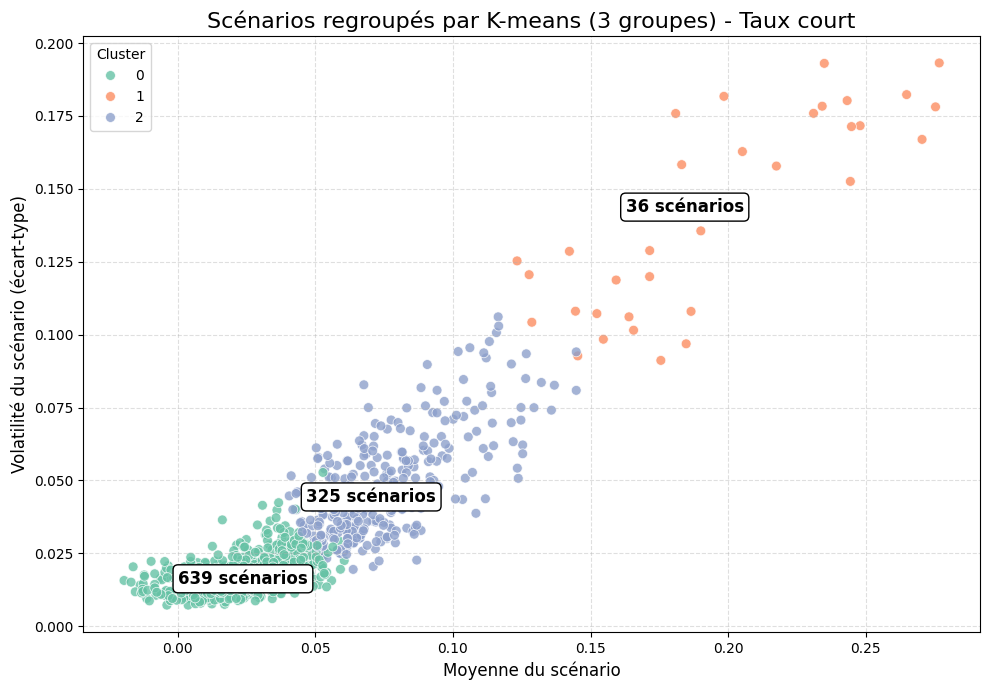

Cluster_0 contient 639 scénarios :
[0, 2, 4, 5, 7, 9, 11, 12, 13, 14, 15, 16, 19, 20, 21, 22, 23, 25, 26, 29]
...
Cluster_1 contient 36 scénarios :
[18, 28, 70, 76, 133, 191, 213, 272, 297, 314, 339, 363, 368, 373, 385, 450, 485, 513, 555, 581]
...
Cluster_2 contient 325 scénarios :
[1, 3, 6, 8, 10, 17, 24, 27, 31, 33, 35, 38, 40, 44, 47, 49, 54, 56, 61, 63]
...


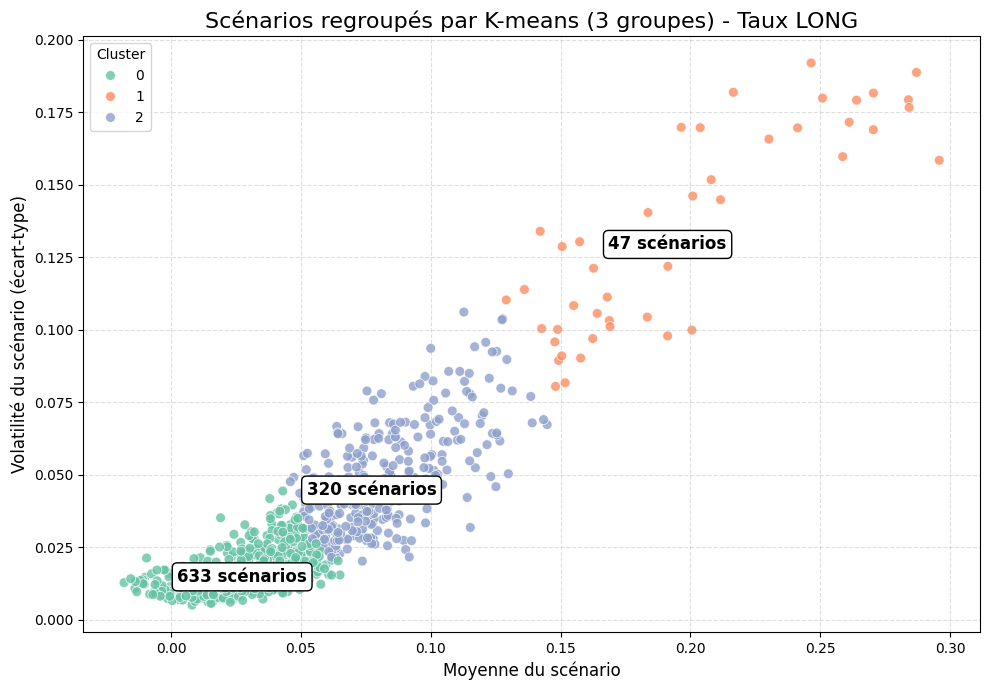

Cluster_0 contient 633 scénarios :
[0, 2, 5, 7, 9, 11, 12, 14, 15, 16, 19, 20, 21, 22, 23, 25, 26, 29, 30, 32]
...
Cluster_1 contient 47 scénarios :
[18, 27, 28, 70, 76, 133, 191, 213, 272, 297, 314, 317, 339, 363, 368, 373, 385, 394, 450, 485]
...
Cluster_2 contient 320 scénarios :
[1, 3, 4, 6, 8, 10, 13, 17, 24, 31, 33, 35, 38, 40, 44, 47, 49, 52, 54, 56]
...


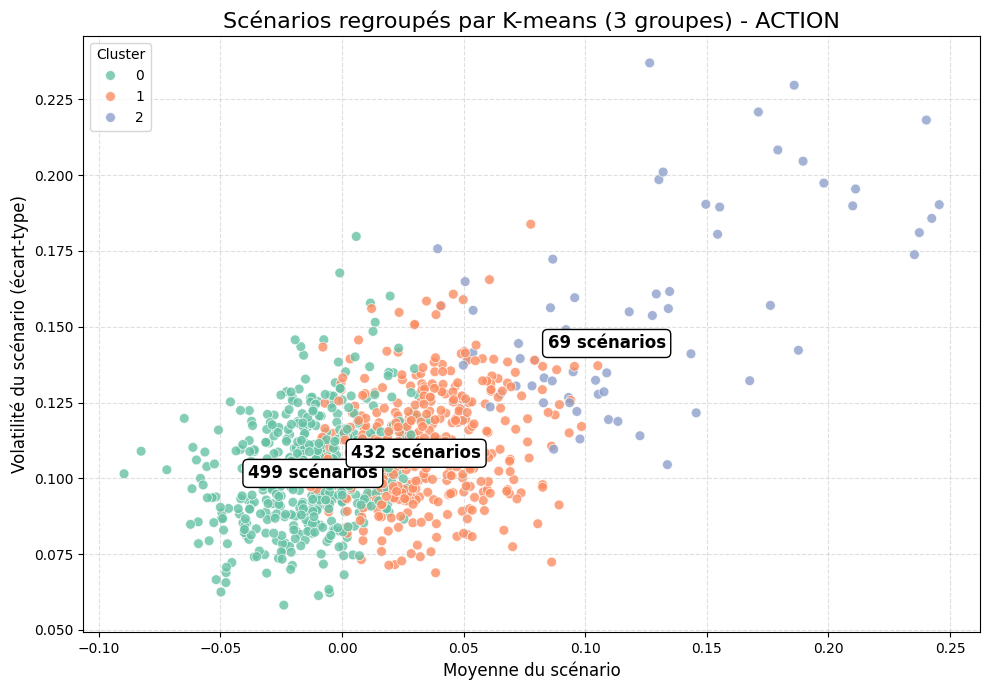

Cluster_0 contient 499 scénarios :
[0, 2, 5, 7, 9, 11, 12, 15, 16, 19, 21, 22, 24, 26, 29, 30, 32, 34, 37, 39]
...
Cluster_1 contient 432 scénarios :
[1, 3, 4, 8, 10, 13, 14, 17, 20, 23, 25, 33, 35, 36, 38, 40, 42, 44, 47, 49]
...
Cluster_2 contient 69 scénarios :
[6, 18, 27, 28, 31, 70, 76, 133, 191, 213, 218, 225, 247, 272, 297, 314, 317, 339, 342, 348]
...


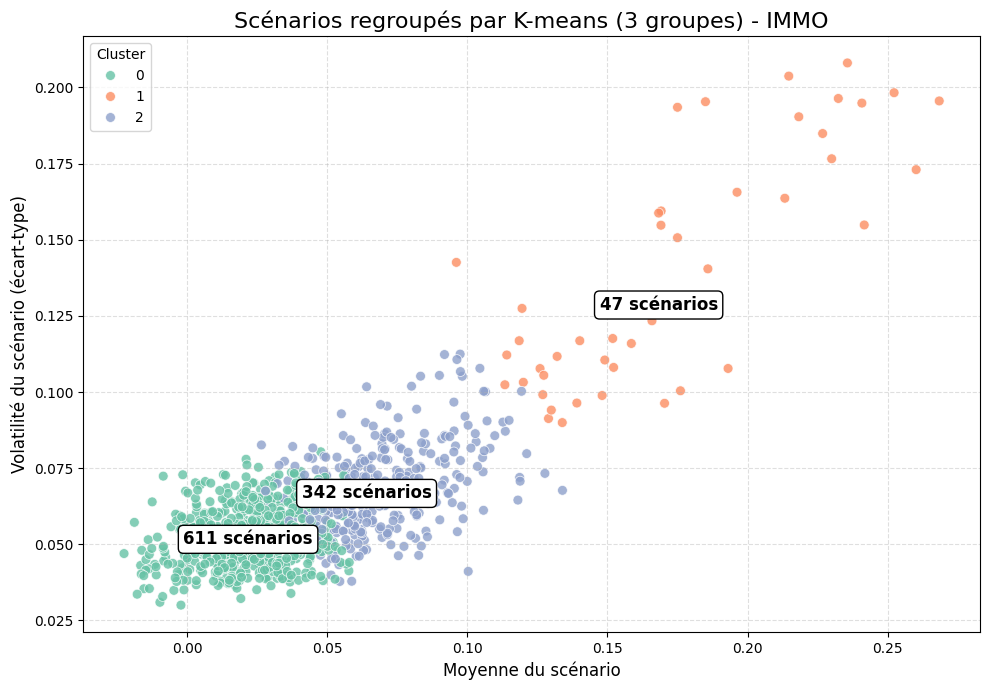

Cluster_0 contient 611 scénarios :
[0, 2, 4, 5, 7, 9, 11, 12, 14, 15, 16, 19, 20, 21, 22, 25, 26, 29, 30, 32]
...
Cluster_1 contient 47 scénarios :
[18, 27, 28, 70, 76, 133, 191, 213, 218, 272, 297, 314, 317, 339, 363, 368, 373, 385, 394, 450]
...
Cluster_2 contient 342 scénarios :
[1, 3, 6, 8, 10, 13, 17, 23, 24, 31, 33, 35, 36, 38, 40, 44, 47, 49, 54, 56]
...


In [17]:
scenarios_by_cluster = cluster_scenarios_kmeans(TL_matrix, "Scénarios regroupés par K-means (3 groupes) - Taux court")
scenarios_by_cluster = cluster_scenarios_kmeans(TLT_matrix, "Scénarios regroupés par K-means (3 groupes) - Taux LONG")
scenarios_by_cluster = cluster_scenarios_kmeans(ACT_matrix, "Scénarios regroupés par K-means (3 groupes) - ACTION")
scenarios_by_cluster = cluster_scenarios_kmeans(IMMO_matrix, "Scénarios regroupés par K-means (3 groupes) - IMMO")

TL_matrix.shape[0] :  1000
Corrélation moyenne : 0.838
Corrélation min : 0.086
Corrélation max : 0.993


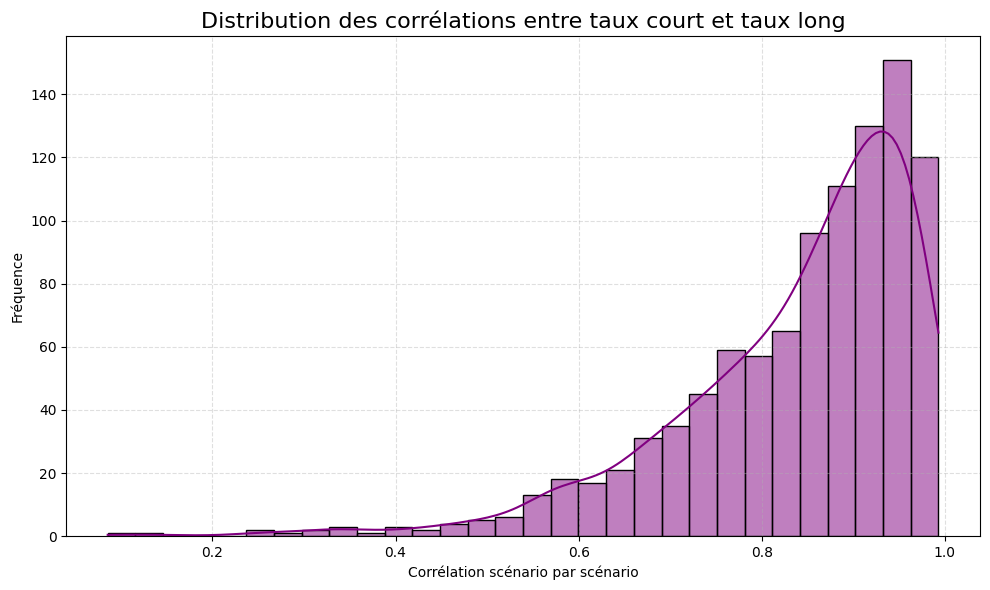

In [18]:

# Vérification des dimensions
assert TL_matrix.shape == TLT_matrix.shape, "Les deux matrices doivent avoir la même forme"
print("TL_matrix.shape[0] : ", TL_matrix.shape[0])

# Étape 1 : Calcul de la corrélation scénario par scénario
correlations = []
for i in range(TL_matrix.shape[0]):
    corr = np.corrcoef(TL_matrix[i], TLT_matrix[i])[0, 1]
    correlations.append(corr)

correlations = np.array(correlations)

# Étape 2 : Statistiques descriptives
print(f"Corrélation moyenne : {np.mean(correlations):.3f}")
print(f"Corrélation min : {np.min(correlations):.3f}")
print(f"Corrélation max : {np.max(correlations):.3f}")

# Étape 3 : Visualisation de la distribution des corrélations
plt.figure(figsize=(10, 6))
sns.histplot(correlations, bins=30, kde=True, color='purple')
plt.title("Distribution des corrélations entre taux court et taux long", fontsize=16)
plt.xlabel("Corrélation scénario par scénario")
plt.ylabel("Fréquence")
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

1.4 Quantiles Par année

# Section 3 - étude statistique exploratoire BE & PVFP

📊 Statistiques descriptives :
                 BE          PVFP
count  9.990000e+02  9.990000e+02
mean   1.182928e+07  8.182578e+05
std    1.325316e+06  3.501620e+05
min    7.933769e+06 -1.162633e+06
25%    1.094057e+07  6.754185e+05
50%    1.173167e+07  8.339008e+05
75%    1.260581e+07  1.020076e+06
max    1.752459e+07  1.867620e+06

🔗 Corrélation BE ↔ PVFP : 0.0424


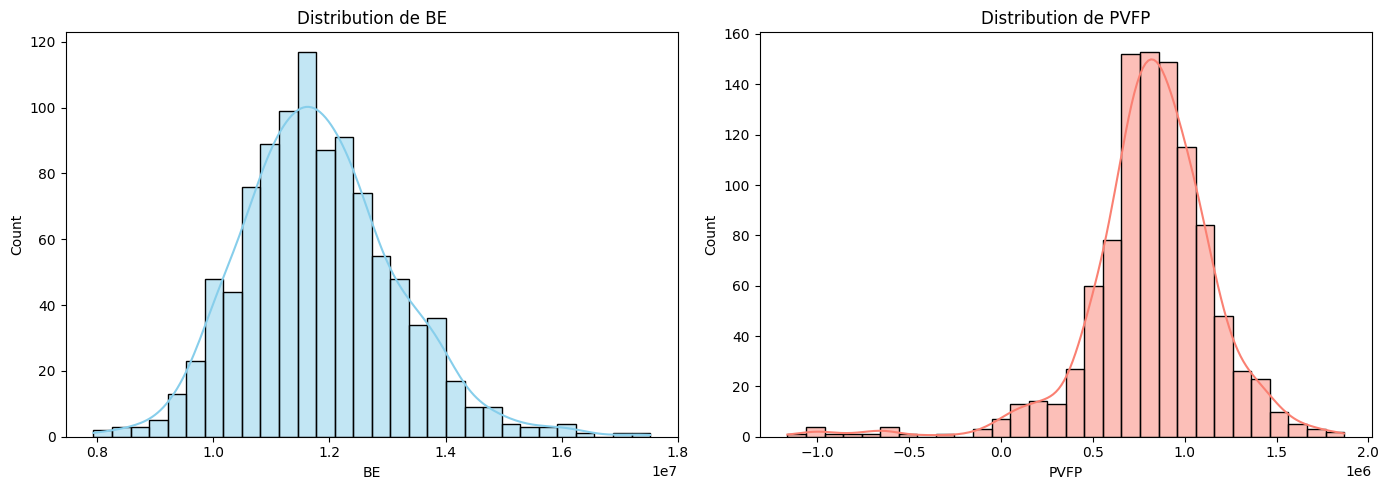

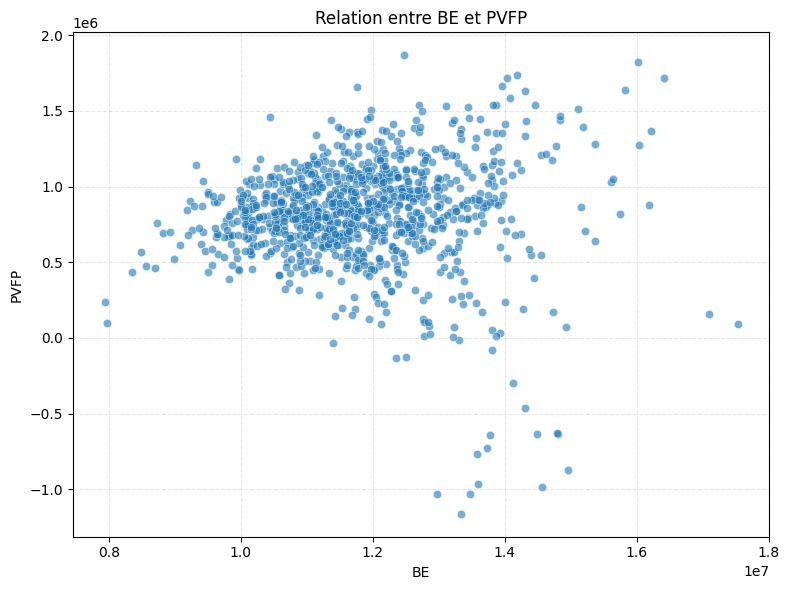

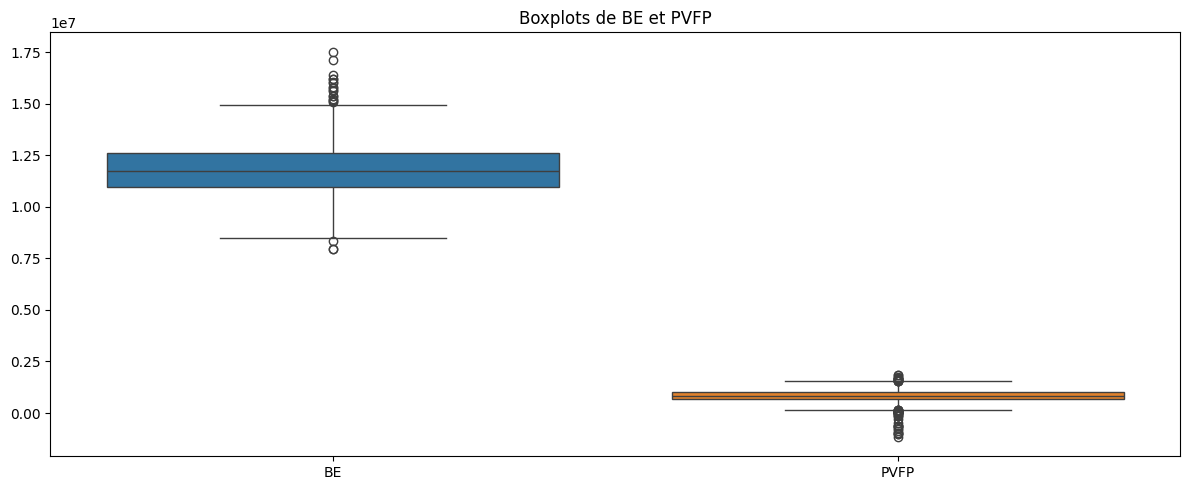

In [19]:

# Charger les données
df = pd.read_excel("BE_PVFP.xlsx", header=None)
df.columns = ["Scenario", "BE", "PVFP"]

# Nettoyage : suppression des lignes vides ou non numériques
df = df[pd.to_numeric(df["BE"], errors='coerce').notnull()]
df = df[pd.to_numeric(df["PVFP"], errors='coerce').notnull()]
df["BE"] = df["BE"].astype(float)
df["PVFP"] = df["PVFP"].astype(float)

# Statistiques descriptives
print("📊 Statistiques descriptives :")
print(df[["BE", "PVFP"]].describe())

# Corrélation
correlation = df["BE"].corr(df["PVFP"])
print(f"\n🔗 Corrélation BE ↔ PVFP : {correlation:.4f}")

# Histogrammes
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.histplot(df["BE"], bins=30, kde=True, color='skyblue')
plt.title("Distribution de BE")
plt.xlabel("BE")

plt.subplot(1, 2, 2)
sns.histplot(df["PVFP"], bins=30, kde=True, color='salmon')
plt.title("Distribution de PVFP")
plt.xlabel("PVFP")

plt.tight_layout()
plt.show()

# Nuage de points
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="BE", y="PVFP", alpha=0.6)
plt.title("Relation entre BE et PVFP")
plt.xlabel("BE")
plt.ylabel("PVFP")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(12, 5))
sns.boxplot(data=df[["BE", "PVFP"]])
plt.title("Boxplots de BE et PVFP")
plt.tight_layout()
plt.show()

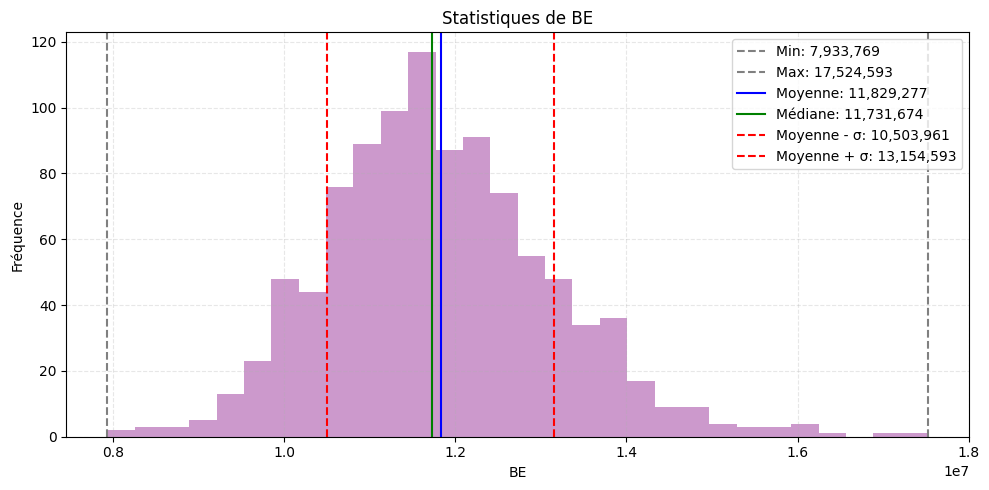

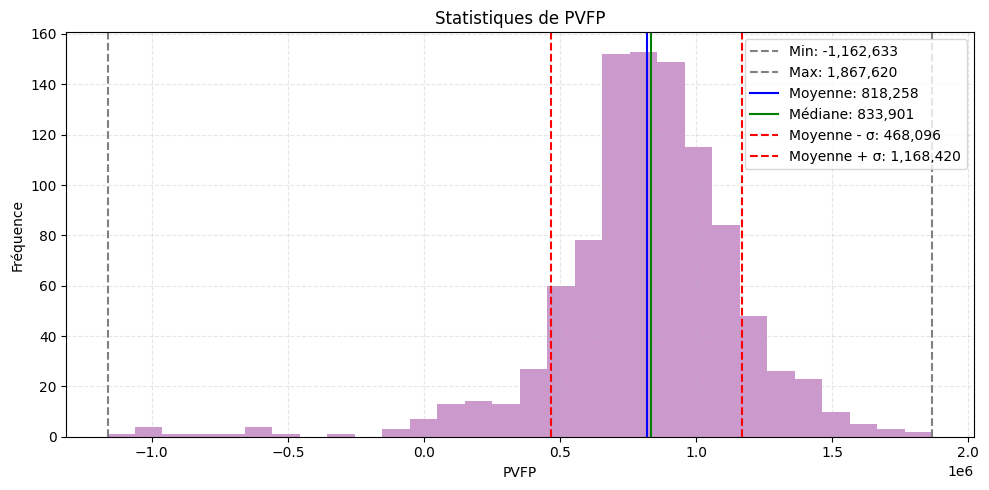

In [20]:

# Charger les données
df = pd.read_excel("BE_PVFP.xlsx", header=None)
df.columns = ["Scenario", "BE", "PVFP"]

# Nettoyage
df = df[pd.to_numeric(df["BE"], errors='coerce').notnull()]
df = df[pd.to_numeric(df["PVFP"], errors='coerce').notnull()]
df["BE"] = df["BE"].astype(float)
df["PVFP"] = df["PVFP"].astype(float)

# Fonction pour tracer les statistiques
def plot_stat_summary(variable, name):
    data = df[variable]
    mean = data.mean()
    std = data.std()
    median = data.median()
    min_val = data.min()
    max_val = data.max()

    plt.figure(figsize=(10, 5))
    plt.axvline(min_val, color='gray', linestyle='--', label=f"Min: {min_val:,.0f}")
    plt.axvline(max_val, color='gray', linestyle='--', label=f"Max: {max_val:,.0f}")
    plt.axvline(mean, color='blue', linestyle='-', label=f"Moyenne: {mean:,.0f}")
    plt.axvline(median, color='green', linestyle='-', label=f"Médiane: {median:,.0f}")
    plt.axvline(mean - std, color='red', linestyle='--', label=f"Moyenne - σ: {(mean - std):,.0f}")
    plt.axvline(mean + std, color='red', linestyle='--', label=f"Moyenne + σ: {(mean + std):,.0f}")

    plt.hist(data, bins=30, alpha=0.4, color='purple')
    plt.title(f"Statistiques de {name}")
    plt.xlabel(name)
    plt.ylabel("Fréquence")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

# Tracer pour BE
plot_stat_summary("BE", "BE")

# Tracer pour PVFP
plot_stat_summary("PVFP", "PVFP")

Clustering corrélation ( BE, PVFP)

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

def cluster_be_pvfp(be_df, pvfp_df, plot_title="Clustering BE vs PVFP", k=3):
    """
    Applique K-means sur les colonnes BE et PVFP et trace les clusters.

    Parameters:
    - be_df : DataFrame contenant la colonne "BE"
    - pvfp_df : DataFrame contenant la colonne "PVFP"
    - plot_title : str, titre du graphique
    - k : int, nombre de clusters (par défaut 3)

    Returns:
    - scenarios_by_cluster : dict, clés = "Cluster_i", valeurs = liste des indices de scénarios
    """
    # Étape 1 : Construction de la matrice
    data_matrix = np.column_stack((be_df["BE"].values, pvfp_df["PVFP"].values))

    # Étape 2 : Clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_matrix)

    # Étape 3 : Visualisation
    plt.figure(figsize=(10, 7))
    palette = sns.color_palette("Set2", k)
    sns.scatterplot(x=data_matrix[:, 0], y=data_matrix[:, 1], hue=labels,
                    palette=palette, s=60, alpha=0.85)

    # Annotation des clusters
    for cluster in range(k):
        indices = np.where(labels == cluster)[0]
        x_cluster = data_matrix[indices, 0]
        y_cluster = data_matrix[indices, 1]
        count = len(indices)
        x_text = np.median(x_cluster)
        y_text = np.median(y_cluster)
        plt.text(x_text, y_text, f"{count} scénarios", fontsize=12, weight='bold',
                 ha='center', va='center',
                 bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

    # Personnalisation
    plt.title(plot_title, fontsize=16)
    plt.xlabel("BE", fontsize=12)
    plt.ylabel("PVFP", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.legend(title="Cluster")
    plt.tight_layout()
    plt.show()

    # Regrouper les indices par cluster
    scenarios_by_cluster = {}
    for cluster_id in range(k):
        indices = np.where(labels == cluster_id)[0]
        scenarios_by_cluster[f"Cluster_{cluster_id}"] = indices.tolist()

    # Affichage résumé
    for name, scenario_list in scenarios_by_cluster.items():
        print(f"{name} contient {len(scenario_list)} scénarios :")
        print(scenario_list[:20])
        print("...")

    return scenarios_by_cluster

In [ ]:
cluster_be_pvfp(be_df, pvfp_df, plot_title="Clustering des scénarios BE vs PVFP", k=3)

Clustering BE

In [23]:
def cluster_be(be_df, plot_title="Clustering sur BE", k=3):
    be_values = be_df["BE"].values.reshape(-1, 1)
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(be_values)

    plt.figure(figsize=(10, 5))
    palette = sns.color_palette("Set2", k)
    sns.scatterplot(x=range(len(be_values)), y=be_values.flatten(), hue=labels,
                    palette=palette, s=60, alpha=0.85)

    # Ajouter le nombre de points par cluster
    for cluster_id in range(k):
        indices = np.where(labels == cluster_id)[0]
        y_cluster = be_values[indices].flatten()
        x_text = np.median(indices)
        y_text = np.median(y_cluster)
        count = len(indices)
        plt.text(x_text, y_text, f"{count} pts", fontsize=11, weight='bold',
                 ha='center', va='center',
                 bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

    plt.title(plot_title, fontsize=16)
    plt.xlabel("Index scénario", fontsize=12)
    plt.ylabel("BE", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.legend(title="Cluster")
    plt.tight_layout()
    plt.show()

    clusters = {}
    for cluster_id in range(k):
        indices = np.where(labels == cluster_id)[0]
        clusters[f"Cluster_{cluster_id}"] = indices.tolist()
        # print(f"Cluster_{cluster_id} contient {len(indices)} scénarios : {indices[:20]}...")

        clusters[f"Cluster_{cluster_id}"] = indices
        print(f"Cluster_{cluster_id} contient {len(indices)} scénarios.")
        print("Premiers 20 scénarios :", ", ".join(map(str, indices[:20])))


    return clusters

Clustering PVFP

In [24]:
def cluster_pvfp(pvfp_df, plot_title="Clustering sur PVFP", k=3):
    pvfp_values = pvfp_df["PVFP"].values.reshape(-1, 1)
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pvfp_values)

    plt.figure(figsize=(10, 5))
    palette = sns.color_palette("Set2", k)
    sns.scatterplot(x=range(len(pvfp_values)), y=pvfp_values.flatten(), hue=labels,
                    palette=palette, s=60, alpha=0.85)

    # Ajouter le nombre de points par cluster
    for cluster_id in range(k):
        indices = np.where(labels == cluster_id)[0]
        y_cluster = pvfp_values[indices].flatten()
        x_text = np.median(indices)
        y_text = np.median(y_cluster)
        count = len(indices)
        plt.text(x_text, y_text, f"{count} pts", fontsize=11, weight='bold',
                 ha='center', va='center',
                 bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

    plt.title(plot_title, fontsize=16)
    plt.xlabel("Index scénario", fontsize=12)
    plt.ylabel("PVFP", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.legend(title="Cluster")
    plt.tight_layout()
    plt.show()

    clusters = {}
    for cluster_id in range(k):
        indices = np.where(labels == cluster_id)[0]
        clusters[f"Cluster_{cluster_id}"] = indices.tolist()
        # print(f"Cluster_{cluster_id} contient {len(indices)} scénarios : {indices[:20]}...")
        clusters[f"Cluster_{cluster_id}"] = indices
        print(f"Cluster_{cluster_id} contient {len(indices)} scénarios:")
        print("Premiers 20 scénarios :", ", ".join(map(str, indices[:20])))

    return clusters

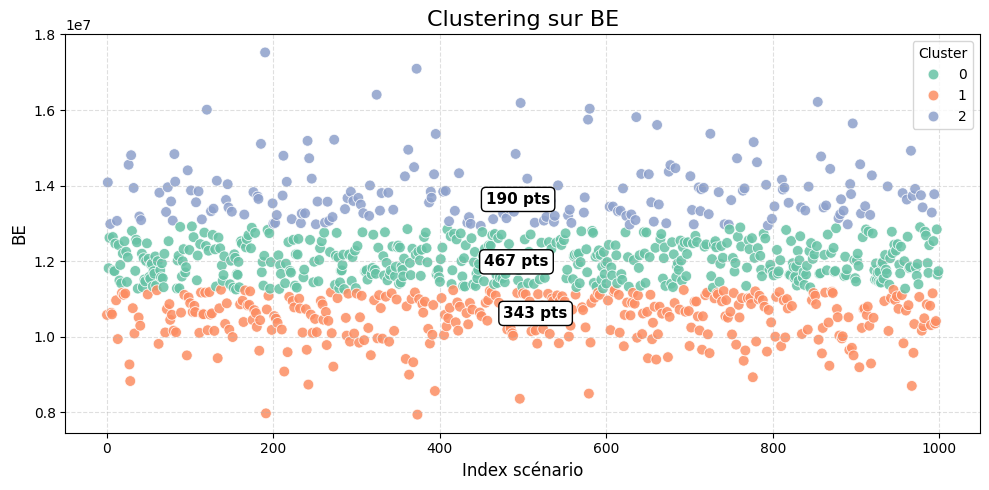

Cluster_0 contient 467 scénarios.
Premiers 20 scénarios : 2, 3, 7, 8, 9, 10, 14, 15, 16, 17, 19, 21, 23, 24, 25, 30, 34, 35, 36, 37
Cluster_1 contient 343 scénarios.
Premiers 20 scénarios : 0, 5, 6, 11, 13, 18, 20, 22, 27, 28, 31, 33, 38, 40, 49, 60, 62, 70, 72, 75
Cluster_2 contient 190 scénarios.
Premiers 20 scénarios : 1, 4, 12, 26, 29, 32, 39, 41, 63, 71, 73, 77, 79, 81, 82, 97, 101, 107, 110, 114


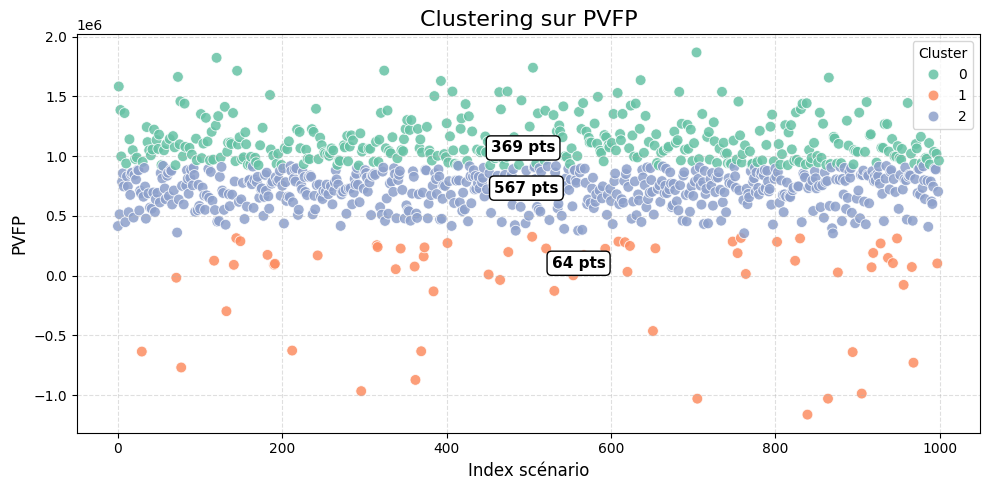

Cluster_0 contient 369 scénarios:
Premiers 20 scénarios : 1, 3, 4, 8, 10, 14, 18, 21, 23, 30, 35, 36, 38, 40, 42, 44, 47, 49, 50, 53
Cluster_1 contient 64 scénarios:
Premiers 20 scénarios : 29, 71, 77, 117, 132, 141, 144, 149, 182, 190, 191, 212, 243, 296, 315, 316, 338, 344, 361, 362
Cluster_2 contient 567 scénarios:
Premiers 20 scénarios : 0, 2, 5, 6, 7, 9, 11, 12, 13, 15, 16, 17, 19, 20, 22, 24, 25, 26, 27, 28


{'Cluster_0': array([  1,   3,   4,   8,  10,  14,  18,  21,  23,  30,  35,  36,  38,
         40,  42,  44,  47,  49,  50,  53,  56,  59,  63,  67,  69,  70,
         73,  75,  76,  79,  81,  82,  87,  90,  95,  96, 101, 102, 104,
        107, 109, 112, 114, 116, 119, 120, 122, 125, 130, 133, 134, 137,
        138, 140, 143, 145, 146, 148, 151, 153, 155, 156, 158, 161, 162,
        167, 168, 171, 173, 176, 185, 186, 189, 193, 195, 199, 203, 206,
        208, 218, 221, 222, 226, 229, 231, 233, 236, 238, 241, 244, 246,
        248, 251, 252, 255, 257, 258, 260, 262, 267, 269, 270, 275, 276,
        279, 280, 282, 284, 286, 293, 295, 297, 298, 305, 307, 311, 314,
        317, 318, 320, 324, 326, 328, 330, 332, 334, 340, 345, 347, 348,
        350, 352, 355, 357, 365, 367, 368, 370, 376, 379, 380, 382, 385,
        389, 393, 397, 399, 400, 402, 404, 407, 408, 410, 413, 417, 418,
        421, 423, 425, 427, 431, 437, 441, 442, 447, 448, 450, 453, 455,
        456, 459, 460, 463, 464, 466, 

In [25]:
cluster_be(be_df, k=3)
cluster_pvfp(pvfp_df, k=3)

Exemple Clustering 1 : afficher pour 4 paramètres les trajectoires classifiés dans le clustering 1

In [54]:
import matplotlib.pyplot as plt
import numpy as np

def plot_individual_gse(cluster_indices, TL_matrix, TLT_matrix, ACT_matrix, IMMO_matrix, cluster_id=1):
    params = {
        "Taux court (TL)": TL_matrix,
        "Taux long (TLT)": TLT_matrix,
        "Action (ACT)": ACT_matrix,
        "Immobilier (IMMO)": IMMO_matrix
    }

    # S'assurer que cluster_indices est une liste d'entiers
    cluster_indices = list(np.array(cluster_indices).flatten())

    for name, matrix in params.items():
        plt.figure(figsize=(12, 5))

        # Tracer chaque trajectoire
        for idx in cluster_indices:
            plt.plot(range(matrix.shape[1]), matrix[idx, :], alpha=0.4, linewidth=1)

        # 🔍 Trouver les deux trajectoires les plus hautes
        max_vals = []
        for idx in cluster_indices:
            local_max = matrix[idx, :].max()
            max_vals.append((local_max, idx))

        # Trier par valeur max décroissante
        max_vals_sorted = sorted(max_vals, key=lambda x: x[0], reverse=True)

        # Prendre les deux premiers
        top_two = max_vals_sorted[:2]

        # Ajouter une annotation pour chacun
        for rank, (val, idx) in enumerate(top_two, start=1):
            year_max = np.argmax(matrix[idx, :])  # année où la valeur est max
            plt.plot(range(matrix.shape[1]), matrix[idx, :], linewidth=2,
                     label=f"Top {rank} – Scénario {idx}")
            plt.text(year_max, val, f"Scénario {idx}", fontsize=11, weight="bold",
                     ha="center", va="bottom", color="black",
                     bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.3"))

        # Ajuster les axes
        plt.title(f"Trajectoires individuelles – {name} – Cluster {cluster_id}", fontsize=15)
        plt.xlabel("Année", fontsize=12)
        plt.ylabel("Valeur", fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.5)

        # 🔧 Forcer l'échelle demandée
        plt.xlim(0, 45)       # Axe X jusqu’à 45 ans
        plt.ylim(top=0.8)     # Borne supérieure fixée à 0.8, borne inférieure automatique

        plt.legend()
        plt.tight_layout()
        plt.show()

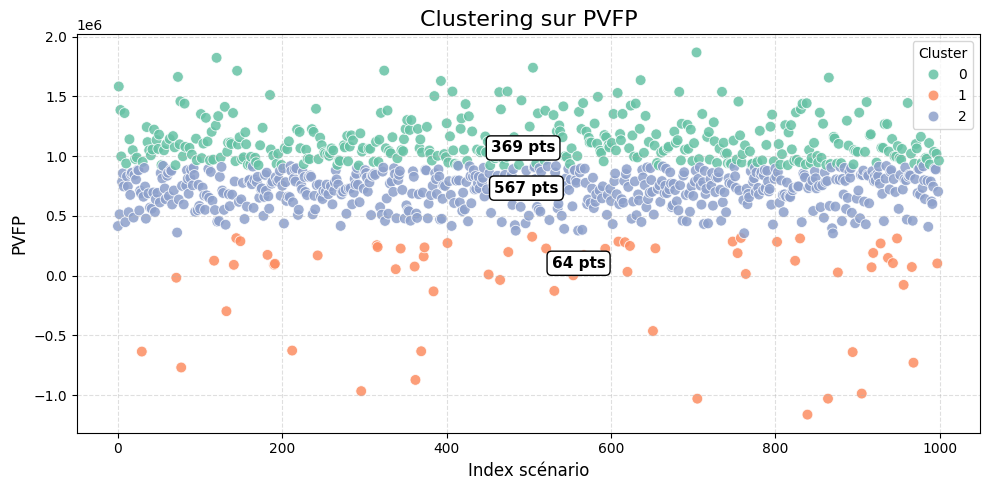

Cluster_0 contient 369 scénarios:
Premiers 20 scénarios : 1, 3, 4, 8, 10, 14, 18, 21, 23, 30, 35, 36, 38, 40, 42, 44, 47, 49, 50, 53
Cluster_1 contient 64 scénarios:
Premiers 20 scénarios : 29, 71, 77, 117, 132, 141, 144, 149, 182, 190, 191, 212, 243, 296, 315, 316, 338, 344, 361, 362
Cluster_2 contient 567 scénarios:
Premiers 20 scénarios : 0, 2, 5, 6, 7, 9, 11, 12, 13, 15, 16, 17, 19, 20, 22, 24, 25, 26, 27, 28


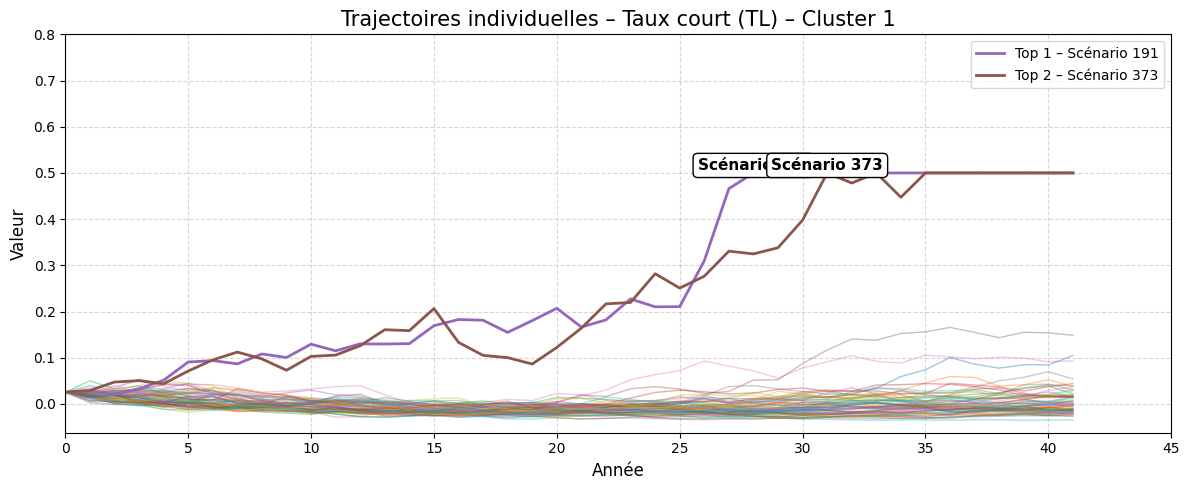

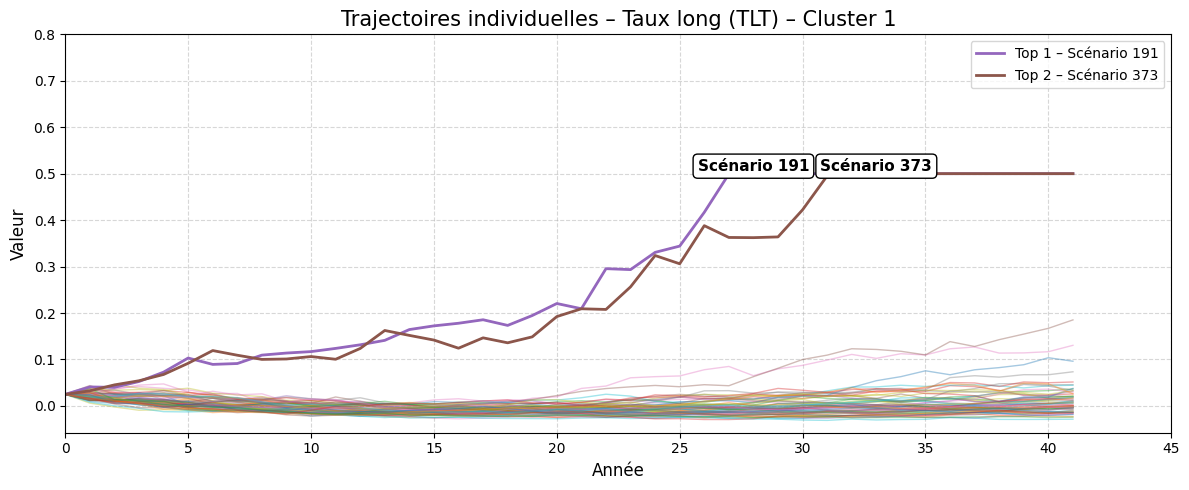

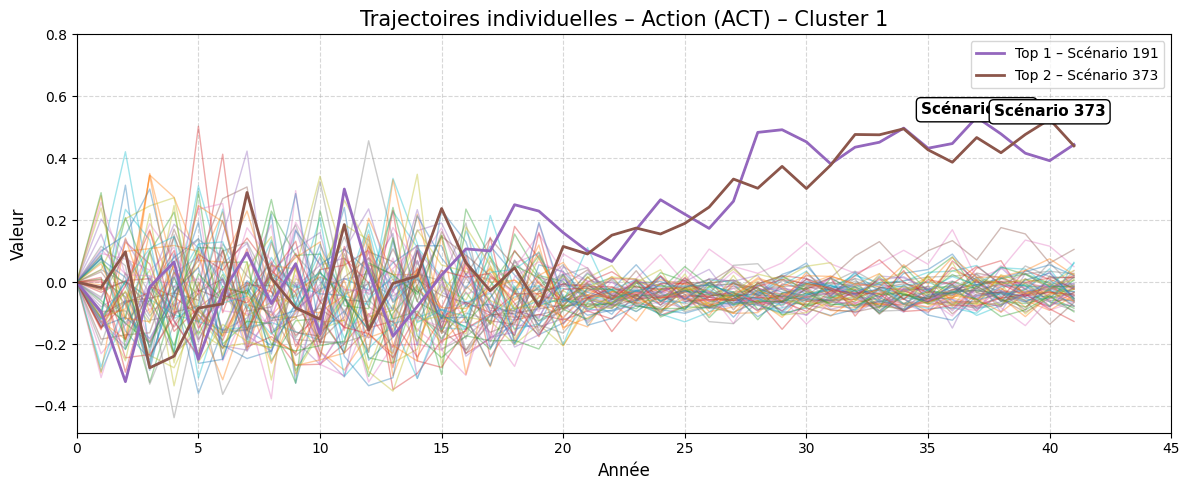

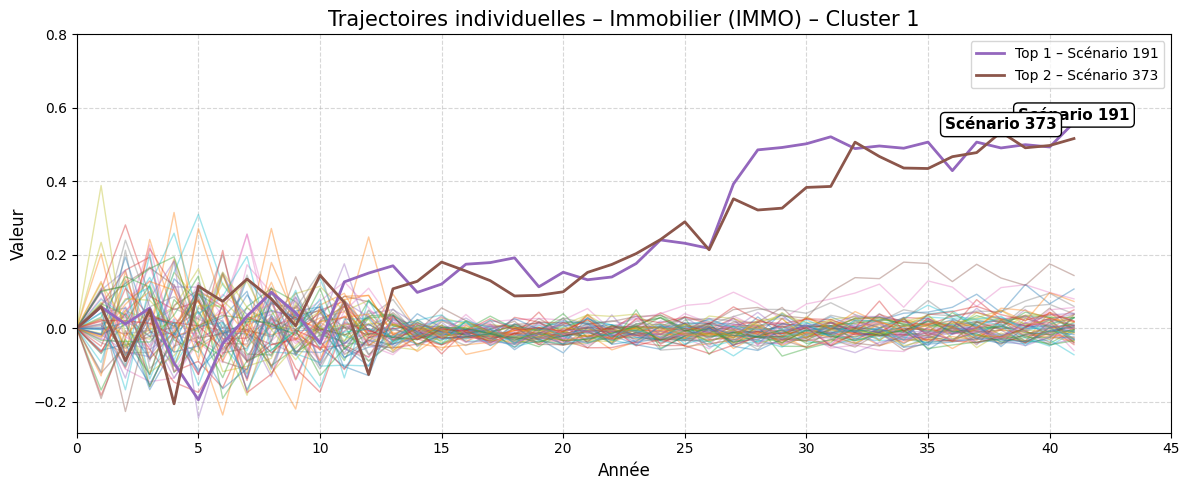

In [55]:
clusters = cluster_pvfp(pvfp_df, k=3)
plot_individual_gse(clusters["Cluster_1"], TL_matrix, TLT_matrix, ACT_matrix, IMMO_matrix, cluster_id=1)

Tracer le scénario et la valeur de scénario pour N° scénario fixé

📋 Scénario 191 – Valeurs Action :
[ 0.         -0.09614791 -0.32144154 -0.01602026  0.0650843  -0.24939791
 -0.03304855  0.09433864 -0.06939208  0.05954242 -0.1676615   0.30048654
  0.03461983 -0.17480481 -0.07869643  0.0228514   0.10709302  0.10062038
  0.24977193  0.22931313  0.15961881  0.10015672  0.06664237  0.16975092
  0.26583804  0.21926685  0.17338791  0.26102273  0.48342872  0.49194762
  0.45275113  0.38166103  0.43556518  0.45152122  0.49716331  0.43225883
  0.4473565   0.53230053  0.47843603  0.41609088  0.39197393  0.44413413]
📋 Scénario 373 – Valeurs Action :
[ 0.         -0.01763049  0.09790552 -0.27664072 -0.23923954 -0.0841314
 -0.0701576   0.28940293  0.01258128 -0.08304023 -0.11993841  0.18566676
 -0.15525005 -0.00419676  0.01965592  0.23755996  0.06243503 -0.02813288
  0.04641902 -0.07863592  0.11513607  0.09078573  0.15148311  0.17451972
  0.15530341  0.18954324  0.24218018  0.33264571  0.30301168  0.37361932
  0.30208566  0.37799782  0.47659429  0.47563161  0.4949

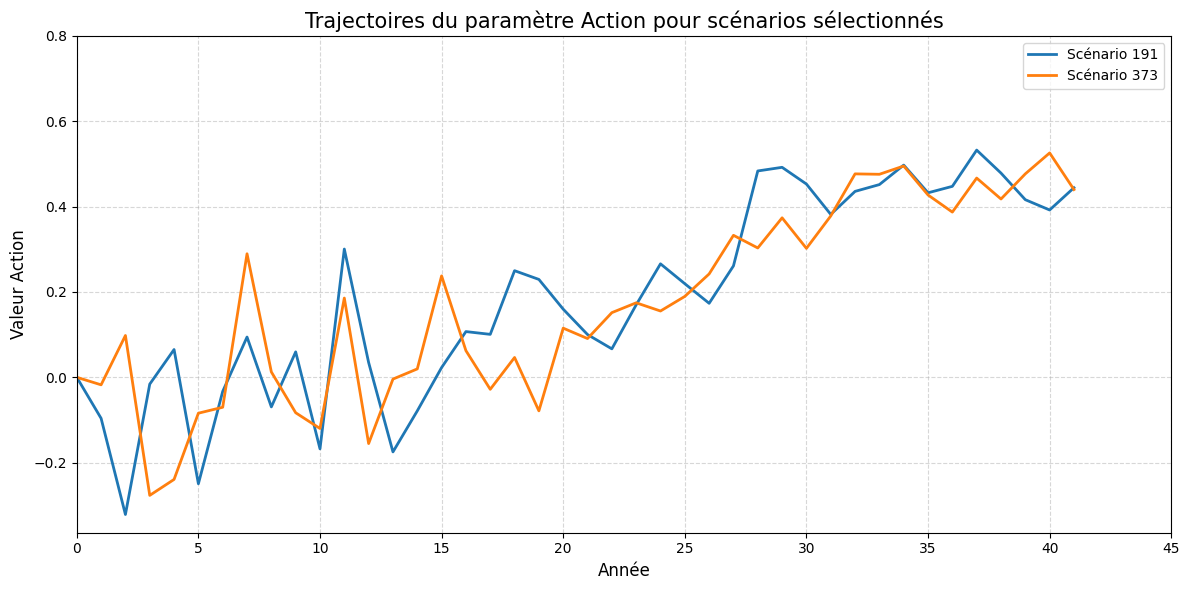

In [57]:
import matplotlib.pyplot as plt

def plot_and_print_action(ACT_matrix, scenario_ids=[191, 373]):
    plt.figure(figsize=(12, 6))

    for sid in scenario_ids:
        values = ACT_matrix[sid, :]   # les 42 valeurs du scénario
        print(f"📋 Scénario {sid} – Valeurs Action :")
        print(values)  # affiche toutes les valeurs dans la console

        # Tracer la trajectoire
        plt.plot(range(ACT_matrix.shape[1]), values, linewidth=2, label=f"Scénario {sid}")

    plt.title("Trajectoires du paramètre Action pour scénarios sélectionnés", fontsize=15)
    plt.xlabel("Année", fontsize=12)
    plt.ylabel("Valeur Action", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    plt.xlim(0, 45)   # Axe X jusqu’à 45 ans
    plt.ylim(top=0.8) # Axe Y max fixé à 0.8, min auto
    plt.tight_layout()
    plt.show()

# Exemple d'utilisation
plot_and_print_action(ACT_matrix, scenario_ids=[191, 373])

Pour Taux court et Taux long : calculer le NB de taux < 0% permis 42 ans

In [67]:

# Fonction 1 : compter le nombre d'années où le taux est inférieur à un seuil
def count_years_below_threshold(matrix, seuil=0.0, title="Résultat - années sous seuil"):
    """
    Compte et affiche le nombre de points (scénario × année) où le taux est inférieur au seuil.
    """
    count = (matrix < seuil).sum()
    print(f"{title} : {count} (seuil = {seuil})")
    return count


# Fonction 2 : compter le nombre de variations inter-annuelles supérieures à un seuil
def count_variations_above_threshold(matrix, seuil_var=0.04, title="Résultat - variations au-dessus du seuil"):
    """
    Compte et affiche le nombre de variations inter-annuelles supérieures au seuil.
    """
    variations = np.diff(matrix, axis=1)
    count = (variations > seuil_var).sum()
    print(f"{title} : {count} (seuil = {seuil_var})")
    return count

In [71]:
# Supposons que TL_matrix et TLT_matrix soient définis
count_years_below_threshold(TL_matrix, seuil=0.0, title="Taux court < 0%")
count_years_below_threshold(TLT_matrix, seuil=0.0, title="Taux long < 0%")
count_years_below_threshold(ACT_matrix, seuil=0.0, title="Revalorisation action < 0%")
count_years_below_threshold(IMMO_matrix, seuil=0.0, title="Revalorisation IMMO < 0%")

count_variations_above_threshold(TL_matrix, seuil_var=0.04, title="Variations intra-annuelle taux court > 4%")
count_variations_above_threshold(TLT_matrix, seuil_var=0.04, title="Variations intra-annuelle taux long > 4%")
count_variations_above_threshold(ACT_matrix, seuil_var=0.05, title="Variations intra-annuelle ACTION > 5%")
count_variations_above_threshold(ACT_matrix, seuil_var=0.05, title="Variations intra-annuelle IMMO > 5%")

Taux court < 0% : 4278 (seuil = 0.0)
Taux long < 0% : 2825 (seuil = 0.0)
Revalorisation action < 0% : 18576 (seuil = 0.0)
Revalorisation IMMO < 0% : 9641 (seuil = 0.0)
Variations intra-annuelle taux court > 4% : 471 (seuil = 0.04)
Variations intra-annuelle taux long > 4% : 253 (seuil = 0.04)
Variations intra-annuelle ACTION > 5% : 11885 (seuil = 0.05)
Variations intra-annuelle IMMO > 5% : 11885 (seuil = 0.05)


np.int64(11885)

Matrice des variation inter-annuelles

In [69]:
import numpy as np

# Calcul de la matrice des variations inter-annuelles pour le taux court
var_TL = np.diff(TL_matrix, axis=1)
print("Matrice des variations inter-annuelles - Taux court (TL) :")
print(var_TL)

# Calcul de la matrice des variations inter-annuelles pour le taux long
var_TLT = np.diff(TLT_matrix, axis=1)
print("\nMatrice des variations inter-annuelles - Taux long (TLT) :")
print(var_TLT)

Matrice des variations inter-annuelles - Taux court (TL) :
[[ 0.01586887  0.00421689 -0.01798701 ... -0.00688483  0.00889514
   0.00264469]
 [-0.01848702 -0.00297842  0.01489782 ...  0.04010862 -0.03146172
  -0.00193415]
 [-0.00618347 -0.00759255 -0.00411148 ...  0.00074241 -0.00569738
   0.01461982]
 ...
 [-0.00813431 -0.01215668 -0.00240545 ... -0.01146575 -0.00140597
  -0.00089041]
 [-0.0049511   0.00119367 -0.00466797 ...  0.02523742  0.03991431
   0.01256221]
 [-0.00186047 -0.00193401  0.00805204 ... -0.00418337 -0.00650183
  -0.00042707]]

Matrice des variations inter-annuelles - Taux long (TLT) :
[[ 0.00609277  0.00297659 -0.00247907 ...  0.00678772 -0.00082733
   0.00816059]
 [-0.0050111  -0.00146889  0.00224649 ... -0.0107076   0.00285541
  -0.01994142]
 [-0.0049412   0.00240595  0.00097592 ...  0.00592221  0.00675677
  -0.00433596]
 ...
 [-0.00850627 -0.01037949  0.00023556 ...  0.00492512  0.00103446
  -0.00292514]
 [-0.00040571 -0.00847998 -0.00607662 ...  0.02442953 -0.004

Vérification en Excel -  Clustering 1 : afficher pour 4 paramètres les trajectoires classifiés dans le clustering 1

In [28]:
# Supposons que tu as déjà exécuté :
# clusters = cluster_pvfp(pvfp_df, k=3)

# Extraire les indices du Cluster 1
cluster_1_indices = clusters["Cluster_1"]

# Afficher tous les numéros de scénario
print("📋 Numéros de scénario dans Cluster 1 :")
print(", ".join(map(str, cluster_1_indices)))

📋 Numéros de scénario dans Cluster 1 :
29, 71, 77, 117, 132, 141, 144, 149, 182, 190, 191, 212, 243, 296, 315, 316, 338, 344, 361, 362, 369, 372, 373, 384, 401, 451, 465, 475, 504, 521, 531, 554, 567, 585, 593, 609, 617, 620, 623, 651, 654, 705, 748, 754, 758, 764, 802, 824, 830, 839, 864, 876, 894, 905, 917, 919, 928, 937, 943, 948, 956, 966, 968, 997


In [33]:
import pandas as pd

# Extraire les indices du Cluster 1
cluster_1_indices = clusters["Cluster_1"]

# Créer un DataFrame
df_cluster_1 = pd.DataFrame({"Scenario_ID": cluster_1_indices})

# Sauvegarder en Excel
df_cluster_1.to_excel("cluster_1_scenarios.xlsx", index=False)

# Télécharger le fichier
from google.colab import files
files.download("cluster_1_scenarios.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Pour chaque Paramètre, tracer les jrajectoire IN/OUT cluserting 1

In [49]:
import matplotlib.pyplot as plt
import numpy as np

def plot_cluster_vs_others(cluster_indices, TL_matrix, TLT_matrix, ACT_matrix, IMMO_matrix, cluster_id=1):
    params = {
        "Taux court (TL)": TL_matrix,
        "Taux long (TLT)": TLT_matrix,
        "Action (ACT)": ACT_matrix,
        "Immobilier (IMMO)": IMMO_matrix
    }

    # Convertir indices en liste d'entiers
    cluster_indices = list(np.array(cluster_indices).flatten())
    all_indices = set(range(TL_matrix.shape[0]))
    other_indices = list(all_indices - set(cluster_indices))

    for name, matrix in params.items():
        plt.figure(figsize=(12, 5))

        # Tracer les scénarios hors cluster 1 (gris clair)
        for idx in other_indices:
            plt.plot(range(matrix.shape[1]), matrix[idx, :], color="lightgray", alpha=0.4)

        # Tracer les scénarios du cluster 1 (rouge)
        for idx in cluster_indices:
            plt.plot(range(matrix.shape[1]), matrix[idx, :], color="pink", alpha=0.7)

        plt.title(f"Trajectoires – {name} – Cluster {cluster_id} vs autres", fontsize=15)
        plt.xlabel("Année", fontsize=12)
        plt.ylabel("Valeur", fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.xlim(0, 45)   # Axe X jusqu’à 45 ans
        plt.ylim(top=0.8) # Axe Y max fixé à 0.8, min auto
        plt.tight_layout()
        plt.show()

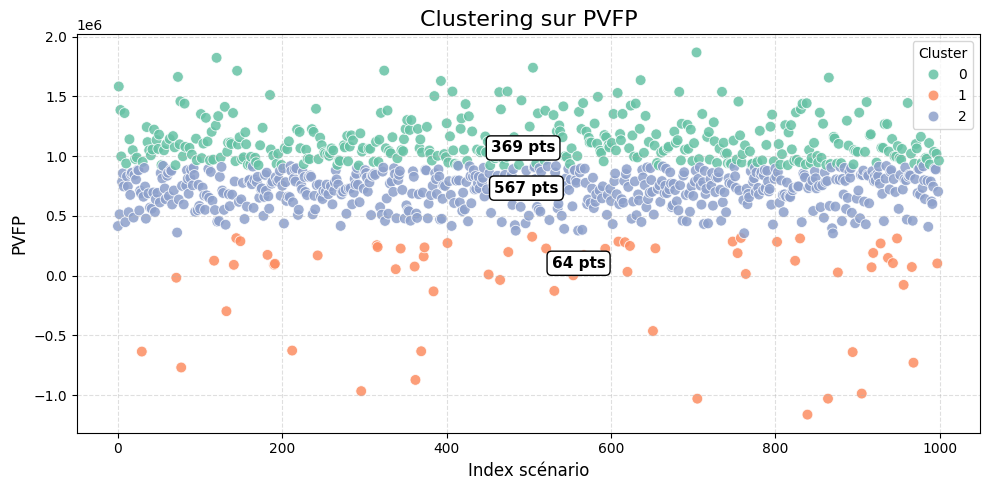

Cluster_0 contient 369 scénarios:
Premiers 20 scénarios : 1, 3, 4, 8, 10, 14, 18, 21, 23, 30, 35, 36, 38, 40, 42, 44, 47, 49, 50, 53
Cluster_1 contient 64 scénarios:
Premiers 20 scénarios : 29, 71, 77, 117, 132, 141, 144, 149, 182, 190, 191, 212, 243, 296, 315, 316, 338, 344, 361, 362
Cluster_2 contient 567 scénarios:
Premiers 20 scénarios : 0, 2, 5, 6, 7, 9, 11, 12, 13, 15, 16, 17, 19, 20, 22, 24, 25, 26, 27, 28


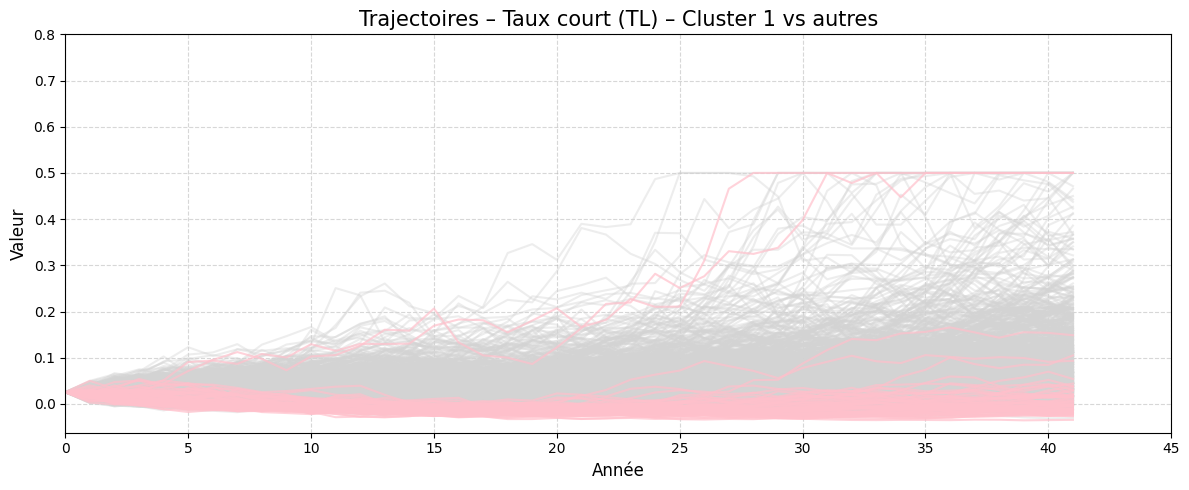

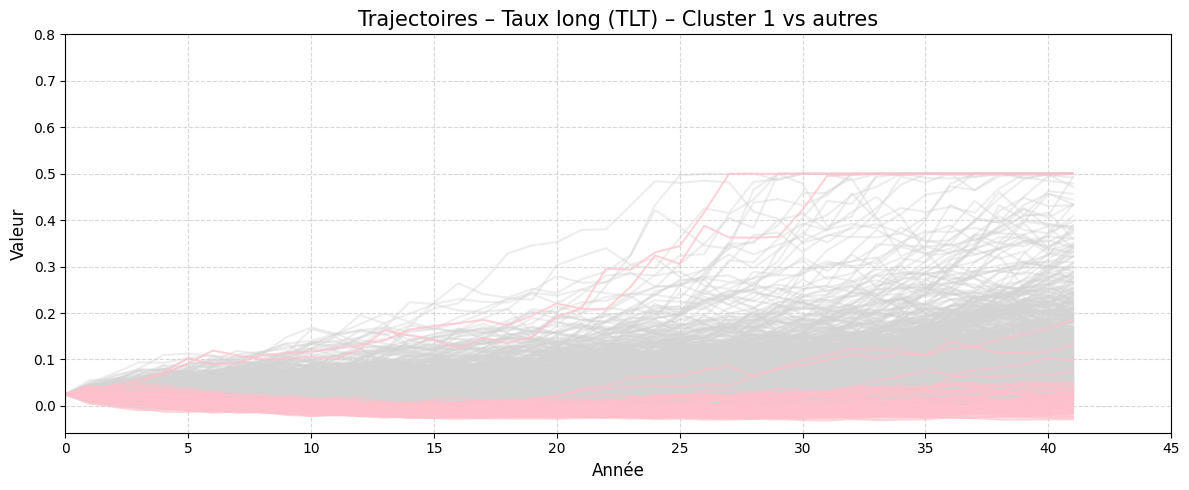

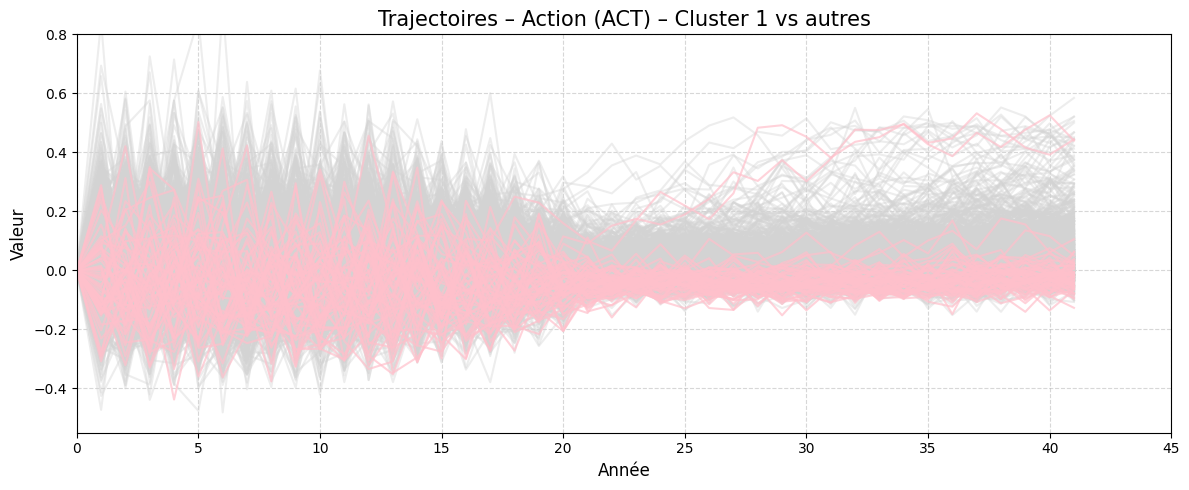

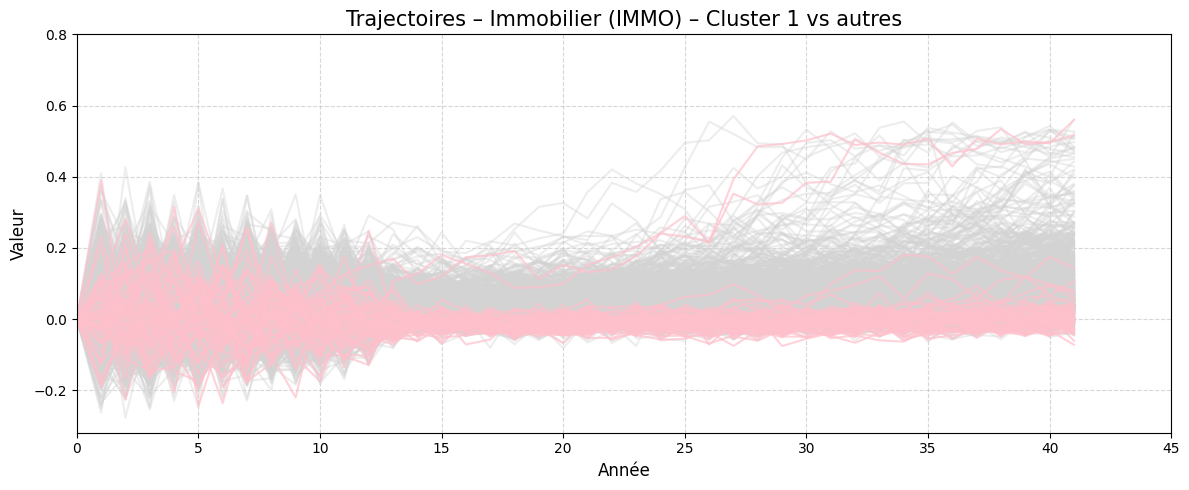

In [50]:
clusters = cluster_pvfp(pvfp_df, k=3)

# Tracer les trajectoires pour Cluster 1 vs autres
plot_cluster_vs_others(clusters["Cluster_1"], TL_matrix, TLT_matrix, ACT_matrix, IMMO_matrix, cluster_id=1)

Paramètre clustering, (2,5), (70,76), (44,47), étude de la cohérence des output be_df, pvfp_df

In [34]:
def check_output_clustering_consistency(be_df, pvfp_df, scenario_groups, k=3):
    """
    Vérifie si les groupes de scénarios sont dans le même cluster pour BE et PVFP.

    Parameters:
    - be_df : DataFrame avec colonne "BE"
    - pvfp_df : DataFrame avec colonne "PVFP"
    - scenario_groups : liste de tuples, ex. [(2,5), (70,76), (44,47)]
    - k : nombre de clusters

    Returns:
    - Résumé affiché à l'écran
    """
    from sklearn.cluster import KMeans

    # Clustering BE
    be_values = be_df["BE"].values.reshape(-1, 1)
    be_labels = KMeans(n_clusters=k, random_state=42).fit_predict(be_values)

    # Clustering PVFP
    pvfp_values = pvfp_df["PVFP"].values.reshape(-1, 1)
    pvfp_labels = KMeans(n_clusters=k, random_state=42).fit_predict(pvfp_values)

    print(f"\n🔍 Vérification de cohérence des groupes dans les clusters BE et PVFP (k={k})\n")

    for group in scenario_groups:
        i, j = group
        same_be = be_labels[i] == be_labels[j]
        same_pvfp = pvfp_labels[i] == pvfp_labels[j]

        print(f"Groupe ({i}, {j}) :")
        print(f"  ➤ BE : Cluster {be_labels[i]} vs {be_labels[j]} → {'✅ même cluster' if same_be else '❌ clusters différents'}")
        print(f"  ➤ PVFP : Cluster {pvfp_labels[i]} vs {pvfp_labels[j]} → {'✅ même cluster' if same_pvfp else '❌ clusters différents'}")
        print("")

    return

In [35]:
scenario_groups = [(2, 5), (70, 76), (44, 47),(12,15),(339,363),(133,191)]
check_output_clustering_consistency(be_df, pvfp_df, scenario_groups, k=3)


🔍 Vérification de cohérence des groupes dans les clusters BE et PVFP (k=3)

Groupe (2, 5) :
  ➤ BE : Cluster 0 vs 1 → ❌ clusters différents
  ➤ PVFP : Cluster 2 vs 2 → ✅ même cluster

Groupe (70, 76) :
  ➤ BE : Cluster 1 vs 1 → ✅ même cluster
  ➤ PVFP : Cluster 0 vs 0 → ✅ même cluster

Groupe (44, 47) :
  ➤ BE : Cluster 0 vs 0 → ✅ même cluster
  ➤ PVFP : Cluster 0 vs 0 → ✅ même cluster

Groupe (12, 15) :
  ➤ BE : Cluster 2 vs 0 → ❌ clusters différents
  ➤ PVFP : Cluster 2 vs 2 → ✅ même cluster

Groupe (339, 363) :
  ➤ BE : Cluster 1 vs 1 → ✅ même cluster
  ➤ PVFP : Cluster 2 vs 2 → ✅ même cluster

Groupe (133, 191) :
  ➤ BE : Cluster 1 vs 1 → ✅ même cluster
  ➤ PVFP : Cluster 0 vs 1 → ❌ clusters différents



Pourcentage de clustering d'output PVFP vs clustering d'input

In [36]:
def evaluate_cluster_consistency(TL_matrix, TLT_matrix, ACT_matrix, IMMO_matrix,
                                 be_df, pvfp_df, k=3):
    """
    Vérifie si les scénarios qui sont dans le même cluster pour les 4 inputs
    sont aussi dans le même cluster pour les outputs BE et PVFP.

    Parameters:
    - TL_matrix, TLT_matrix, ACT_matrix, IMMO_matrix : np.ndarray
    - be_df, pvfp_df : DataFrames avec colonnes "BE" et "PVFP"
    - k : nombre de clusters

    Returns:
    - Pourcentage de cohérence
    """
    from sklearn.cluster import KMeans
    import numpy as np

    # Clustering des inputs
    labels_TL = KMeans(n_clusters=k, random_state=42).fit_predict(TL_matrix)
    labels_TLT = KMeans(n_clusters=k, random_state=42).fit_predict(TLT_matrix)
    labels_ACT = KMeans(n_clusters=k, random_state=42).fit_predict(ACT_matrix)
    labels_IMMO = KMeans(n_clusters=k, random_state=42).fit_predict(IMMO_matrix)

    # Clustering des outputs
    labels_BE = KMeans(n_clusters=k, random_state=42).fit_predict(be_df["BE"].values.reshape(-1, 1))
    labels_PVFP = KMeans(n_clusters=k, random_state=42).fit_predict(pvfp_df["PVFP"].values.reshape(-1, 1))

    n_scenarios = TL_matrix.shape[0]
    matched_count = 0
    total_checked = 0

    for i in range(n_scenarios):
        for j in range(i + 1, n_scenarios):
            # Vérifier si i et j sont dans le même cluster pour les 4 inputs
            if (labels_TL[i] == labels_TL[j] and
                labels_TLT[i] == labels_TLT[j] and
                labels_ACT[i] == labels_ACT[j] and
                labels_IMMO[i] == labels_IMMO[j]):

                total_checked += 1
                # Vérifier si i et j sont aussi dans le même cluster pour les outputs
                if labels_BE[i] == labels_BE[j] and labels_PVFP[i] == labels_PVFP[j]:
                    matched_count += 1

    if total_checked == 0:
        print("⚠️ Aucun groupe commun trouvé dans les 4 clusters d'entrée.")
        return 0.0

    pourcentage = (matched_count / total_checked) * 100
    print(f"\n✅ {matched_count} sur {total_checked} groupes d'entrée cohérents ont aussi des sorties cohérentes.")
    print(f"📊 Pourcentage de cohérence : {pourcentage:.2f}%\n")

    return pourcentage

In [37]:
evaluate_cluster_consistency(TL_matrix, TLT_matrix, ACT_matrix, IMMO_matrix,be_df, pvfp_df, k=3)


✅ 32584 sur 144608 groupes d'entrée cohérents ont aussi des sorties cohérentes.
📊 Pourcentage de cohérence : 22.53%



22.532639964593937

# Section 4 - Marchine learing regression surpervisée

Préparation des données

In [ ]:
# Chaque matrice : shape (1000, 42)
# On concatène les 4 matrices en une seule matrice X
X = np.hstack([TL_matrix, TLT_matrix, ACT_matrix, IMMO_matrix])  # shape (1000, 168)

# Cibles
y_be = be_df["BE"].values  # shape (1000,)
y_pvfp = pvfp_df["PVFP"].values  # shape (1000,)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:

# 🔄 Normalisation par scénario (ligne par ligne)
X_scaled = np.zeros_like(X)
for i in range(X.shape[0]):
    scaler = StandardScaler()
    X_scaled[i, :] = scaler.fit_transform(X[i, :].reshape(-1, 1)).flatten()


Regression multivariée

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split   # divesion des données en ensemble d'entraînement et de test
from sklearn.metrics import mean_squared_error, r2_score  # erreur quadratique moyenne, coeff de determination

# Split 20% de données pour le test, 80% de données pour le train
X_be_train, X_be_test, y_be_train, y_be_test = train_test_split(X_scaled, y_be, test_size=0.2, random_state=42)
X_pvfp_train, X_pvfp_test, y_pvfp_train, y_pvfp_test = train_test_split(X_scaled, y_pvfp, test_size=0.2, random_state=42)

# Modèle Random forest pour prédire BE : 100 arbres
model_be = RandomForestRegressor(n_estimators=100, random_state=42)
model_be.fit(X_be_train, y_be_train)

model_pvfp = RandomForestRegressor(n_estimators=100, random_state=42)
model_pvfp.fit(X_pvfp_train, y_pvfp_train)

# Prédiction BE sur les données de test
y_be_pred = model_be.predict(X_be_test)
y_pvfp_pred = model_pvfp.predict(X_pvfp_test)

# Évaluation
from math import sqrt
print("BE - RMSE :", sqrt(mean_squared_error(y_be_test, y_be_pred)))
print("BE - R² :", r2_score(y_be_test, y_be_pred))

print("pvfp - RMSE :", sqrt(mean_squared_error(y_pvfp_test, y_pvfp_pred)))
print("pvfp - R² :", r2_score(y_pvfp_test, y_pvfp_pred))

In [ ]:
def generate_feature_names():
    labels = ["TL", "TLT", "ACT", "IMMO"]
    feature_names = []
    for label in labels:
        for i in range(1, 43):  # années 1 à 42
            feature_names.append(f"{label}_{i}")
    return feature_names

In [ ]:
def plot_feature_importance_named(importances, title="Importance des variables", step=1):
    feature_names = generate_feature_names()
    x = np.arange(len(importances))

    plt.figure(figsize=(22, 6))  # ✅ élargir la figure
    plt.plot(x, importances, marker='o', linestyle='-', alpha=0.7)
    plt.title(title, fontsize=16)
    plt.xlabel("Paramètre & Année", fontsize=12)
    plt.ylabel("Importance", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.4)

    # ✅ afficher plus de labels en réduisant le pas
    plt.xticks(x[::step], feature_names[::step], rotation=90, fontsize=8)

    plt.tight_layout()
    plt.show()

In [ ]:
importances_be = model_be.feature_importances_
plot_feature_importance_named(importances_be, title="Importance des variables pour BE")

importances_pvfp = model_pvfp.feature_importances_
plot_feature_importance_named(importances_pvfp, title="Importance des variables pour BE")

In [ ]:
pip install xgboost

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from math import sqrt
import numpy as np

def test_models(X, y, target_name="BE"):
    """
    Teste plusieurs modèles de régression et compare leurs performances.

    Parameters:
    - X : matrice des features (shape: n_samples, n_features)
    - y : vecteur cible (shape: n_samples,)
    - target_name : nom de la cible ("BE" ou "PVFP")
    """
    # Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Liste des modèles
    models = {
        "LinearRegression": LinearRegression(),
        "GradientBoosting": GradientBoostingRegressor(random_state=42),
        "XGBoost": XGBRegressor(random_state=42),
        "MLPRegressor": MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
    }

    print(f"\n📊 Évaluation des modèles pour la cible : {target_name}\n")

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        rmse = sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        print(f"🔹 {name} → RMSE: {rmse:.4f} | R²: {r2:.4f}")

In [ ]:
# X = np.hstack([TL_matrix, TLT_matrix, ACT_matrix, IMMO_matrix])
# X_scaled = StandardScaler().fit_transform(X)

test_models(X_scaled, y_be, target_name="BE")
test_models(X_scaled, y_pvfp, target_name="PVFP")

In [ ]:
pip install shap

In [ ]:
import shap

# Entraîner le modèle
model = XGBRegressor(random_state=42)
model.fit(X_be_train, y_be_train)

# Créer l'explainer SHAP
explainer = shap.Explainer(model, X_be_train)
shap_values = explainer(X_be_test)

# Visualisation globale
shap.plots.beeswarm(shap_values, max_display=20)

# Visualisation pour un scénario spécifique
shap.plots.waterfall(shap_values[0])

# Section 4.1 Linearregression - BE

- Entraînement du modèle
- Évaluation des performances
- Analyse des coefficients
- Analyse des résidus
- Visualisation des prédictions
- Interprétation des variables clés


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np

def study_BE(X_scaled, y_be):
    print("\n🔹 Étude approfondie pour BE (Régression Linéaire)\n")

    # 1. Split des données
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_be, test_size=0.2, random_state=42)

    # 2. Entraînement du modèle
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # 3. Évaluation
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"✅ RMSE : {rmse:.4f}")
    print(f"✅ R² : {r2:.4f}")

    # 4. Analyse des coefficients
    plt.figure(figsize=(22, 6))
    plt.plot(model.coef_, marker='o', linestyle='-', alpha=0.7)
    plt.title("📈 Coefficients de la régression linéaire (BE)", fontsize=16)
    plt.xlabel("Variables (TL_1 à IMMO_42)", fontsize=12)
    plt.ylabel("Poids du coefficient", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.4)

    # Affichage des noms de variables
    feature_names = [f"{label}_{i}" for label in ["TL", "TLT", "ACT", "IMMO"] for i in range(1, 43)]
    step = 1
    plt.xticks(np.arange(0, len(feature_names), step), feature_names[::step], rotation=90, fontsize=8)
    plt.tight_layout()
    plt.show()

    # 5. Analyse des résidus
    residuals = y_test - y_pred
    plt.figure(figsize=(6, 4))
    plt.scatter(y_pred, residuals, alpha=0.6)
    plt.axhline(0, color='red', linestyle='--')
    plt.title("📉 Résidus de la régression (BE)", fontsize=14)
    plt.xlabel("BE prédit", fontsize=12)
    plt.ylabel("Erreur (résidu)", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

    # 6. Visualisation des prédictions
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.title("🔍 BE réel vs BE prédit", fontsize=14)
    plt.xlabel("BE réel", fontsize=12)
    plt.ylabel("BE prédit", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

    return model

In [ ]:
model_be = study_BE(X_scaled, y_be)

# Section 4.2 PVFP Gradientboosting

- Entraînement du modèle
- Évaluation des performances
- Importance des variables
- Visualisation des prédictions
- Interprétation avec SHAP


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import matplotlib.pyplot as plt
import shap
import numpy as np

def study_PVFP(X_scaled, y_pvfp):
    print("\n🔸 Étude approfondie pour PVFP (Gradient Boosting)\n")

    # 1. Split des données
    X_pvfp_train, X_pvfp_test, y_pvfp_train, y_pvfp_test = train_test_split(X_scaled, y_pvfp, test_size=0.2, random_state=42)

    # 2. Entraînement du modèle
    model = GradientBoostingRegressor(random_state=42)
    model.fit(X_pvfp_train, y_pvfp_train)
    y_pvfp_pred = model.predict(X_pvfp_test)

    # 3. Évaluation
    rmse = sqrt(mean_squared_error(y_pvfp_test, y_pvfp_pred))
    r2 = r2_score(y_pvfp_test, y_pvfp_pred)
    print(f"✅ RMSE : {rmse:.4f}")
    print(f"✅ R² : {r2:.4f}")

    # 4. Importance des variables (triées et filtrées)
    importances = model.feature_importances_
    feature_names = [f"{label}_{i}" for label in ["TL", "TLT", "ACT", "IMMO"] for i in range(1, 43)]

    # Filtrer les importances non nulles
    non_zero_indices = np.where(importances > 0)[0]
    filtered_importances = importances[non_zero_indices]
    filtered_names = [feature_names[i] for i in non_zero_indices]

    # Trier par ordre décroissant
    sorted_indices = np.argsort(filtered_importances)[::-1]
    sorted_importances = filtered_importances[sorted_indices]
    sorted_names = [filtered_names[i] for i in sorted_indices]

     # Tracer avec annotations
    plt.figure(figsize=(10, max(6, len(sorted_names) * 0.3)))
    bars = plt.barh(sorted_names, sorted_importances, color='skyblue')
    plt.gca().invert_yaxis()
    plt.title("📈 Importance des variables (PVFP - Gradient Boosting)", fontsize=16)
    plt.xlabel("Importance", fontsize=12)
    plt.ylabel("Paramètre + N° variable", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.4)

     # Ajouter les valeurs sur les barres
    for bar in bars:
      width = bar.get_width()
      plt.text(width + 0.001, bar.get_y() + bar.get_height()/2,
             f"{width:.4f}", va='center', fontsize=10, color='black')

    plt.tight_layout()
    plt.show()

    # 5. Visualisation des prédictions
    plt.figure(figsize=(6, 4))
    plt.scatter(y_pvfp_test, y_pvfp_pred, alpha=0.6)
    plt.plot([min(y_pvfp_test), max(y_pvfp_test)], [min(y_pvfp_test), max(y_pvfp_test)], color='red', linestyle='--')
    plt.title("🔍 PVFP réel vs PVFP prédit", fontsize=14)
    plt.xlabel("PVFP réel", fontsize=12)
    plt.ylabel("PVFP prédit", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

    # 6. SHAP values
    feature_names = [f"{label}_{i}" for label in ["TL", "TLT", "ACT", "IMMO"] for i in range(1, 43)]
    explainer = shap.Explainer(model, X_pvfp_train, feature_names=feature_names)
    shap_values = explainer(X_pvfp_test)
    shap.plots.beeswarm(shap_values, max_display=20)

    return model

In [ ]:
model_pvfp = study_PVFP(X_scaled, y_pvfp)

In [ ]:
# 7. SHAP waterfall plot pour un scénario spécifique
scenario_index = 2  # tu peux changer ce numéro pour explorer d'autres scénarios

# Exemple de construction des noms de variables
feature_names = []

for prefix, matrix in zip(["TL", "TLT", "ACT", "IMMO"], [TL_matrix, TLT_matrix, ACT_matrix, IMMO_matrix]):
    for i in range(matrix.shape[1]):
        feature_names.append(f"{prefix}_{i}")
shap_values.feature_names = feature_names

print(f"\n🔍 Décomposition SHAP pour le scénario {scenario_index} :")
shap.plots.waterfall(shap_values[scenario_index], max_display=20)

In [ ]:
# feature_names déjà définis
feature_names = [f"{prefix}_{i}" for prefix, matrix in zip(["TL", "TLT", "ACT", "IMMO"], [TL_matrix, TLT_matrix, ACT_matrix, IMMO_matrix]) for i in range(matrix.shape[1])]

# Recalculer les SHAP values avec noms explicites
explainer = shap.Explainer(model, X_pvfp_train, feature_names=feature_names)
shap_values = explainer(X_pvfp_test)

# Exemple : stocker les top variables pour chaque scénario
top_shap_by_scenario = []

for i in range(len(X_pvfp_test)):
    values = shap_values[i].values
    abs_values = np.abs(values)
    top_indices = np.argsort(abs_values)[::-1][:5]  # top 5 variables
    top_features = [feature_names[j] for j in top_indices]
    top_contributions = values[top_indices]
    top_shap_by_scenario.append(list(zip(top_features, top_contributions)))

# Affichage exemple pour les 3 premiers scénarios
for i in range(6):
    print(f"\n🔍 Scénario {i} – Top 5 variables SHAP :")
    for name, val in top_shap_by_scenario[i]:
        print(f"  {name}: {val:.4f}")

In [ ]:
for i in range(3):  # ou range(len(X_test)) pour tous
    print(f"\n🔍 Waterfall SHAP – Scénario {i}")
    shap.plots.waterfall(shap_values[i], max_display=20)

In [ ]:
# Définir les noms de variables
feature_names = [f"{prefix}_Year{i+1}" for prefix, matrix in zip(["TL", "TLT", "ACT", "IMMO"], [TL_matrix, TLT_matrix, ACT_matrix, IMMO_matrix]) for i in range(matrix.shape[1])]

# Recalculer les SHAP values avec noms
explainer = shap.Explainer(model, X_pvfp_train, feature_names=feature_names)
shap_values = explainer(X_pvfp_test)


In [ ]:

# Extraire les valeurs SHAP dans un DataFrame
shap_df = pd.DataFrame(shap_values.values, columns=feature_names)

# Ajouter la prédiction du modèle et la vraie valeur
shap_df["PVFP_prédit"] = model.predict(X_pvfp_test)
shap_df["PVFP_réel"] = pd.Series(y_pvfp_test)


In [ ]:
# Sauvegarder dans l'environnement Colab
shap_df.to_excel("shap_contributions_PVFP.xlsx", index=False)

# Télécharger le fichier
from google.colab import files
files.download("shap_contributions_PVFP.xlsx")

# Annexe
